# Functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def df_processing(df):
    # correct_perfect: detect only 499
    df['correct_perfect'] = False
    df.loc[df['Change Points'] == "[499]", 'correct_perfect'] = True
    
    # correct partial: result include 499, it might include other change points.
    df['correct_partial'] = df["Change Points"].str.count("499")
    
    # the number of change points
    df['the number of detected change points'] = df["Change Points"].str.count(",") + 1
    df.loc[df['Change Points'] == "[]", 'the number of detected change points'] = 0
    
    # group name
    df["group"] = "rho: " + df["rho"].astype(str) + " , SNR: " + df["SNR"].astype(str)
    
    return df

def accuracy_table(df, sort = False):
    n_sample = df.groupby("group").count()["Repitition"].unique()
    df_count = df[["rho", "SNR", "n", "correct_perfect", "correct_partial"]].groupby(["rho", "SNR", "n"]).sum().reset_index()
    df_count["accuracy_perfect"] = df_count["correct_perfect"]/n_sample
    df_count["accuracy_partial"] = df_count["correct_partial"]/n_sample
    
    if sort:
        df_count=df_count.sort_values("accuracy_partial", ascending=False)
    return df_count

def number_cps_plot(df, name):
    fig, ax = plt.subplots(5, 3, figsize=(20, 20))
    i = -1
    for g, ax in zip(group_list, ax.ravel()):
        i = i + 1
        labels, counts = np.unique(df.loc[df["group"] == g, "the number of detected change points"].values, return_counts = True)
        ax.bar(labels, counts)
        ax.set_title( "(" + greek_list[i] + ") "+ g, fontsize = 20)
        ax.set_xlim(-0.5, 5.5)
        ax.locator_params(axis = "x", integer = True)
        ax.tick_params(axis='x', which='major', labelsize=15)
        ax.tick_params(axis='y', which='major', labelsize=12)
        
        
    fig.tight_layout()
    #fig.suptitle("Estimated number of change points: " + name, fontsize=20).set_y(1.02)
    fig.text( -0.01, 0.5,  'trials', va='center', ha='center',rotation='vertical', fontsize = 20)
    fig.text(0.5, -0.01,  'the number of detected change points', va='center', ha='center', fontsize = 20)
    plt.show()

group_list = np.array(['rho: 0.0 , SNR: 6.0', 'rho: 0.3 , SNR: 6.0',
       'rho: 0.7 , SNR: 6.0', 'rho: 0.0 , SNR: 3.52',
       'rho: 0.3 , SNR: 3.52', 'rho: 0.7 , SNR: 3.52',
       'rho: 0.0 , SNR: 2.07', 'rho: 0.3 , SNR: 2.07',
       'rho: 0.7 , SNR: 2.07', 'rho: 0.0 , SNR: 1.22',
       'rho: 0.3 , SNR: 1.22', 'rho: 0.7 , SNR: 1.22',
       'rho: 0.0 , SNR: 0.71', 'rho: 0.3 , SNR: 0.71',
       'rho: 0.7 , SNR: 0.71'])

greek_list = ["i", "ii", "iii", "iv", "v", "vi",  "vii", "viii", "ix", "x", "xi", "xii", "xiii", "xiv", "xv"]

# Our proposed methods

In [3]:
df = pd.read_csv('results/simulation_five_variate_20230321.csv')
df = df_processing(df)
df

,Repitition,Time,rho,SNR,n,Optimality Gap,Change Points,correct_perfect,correct_partial,the number of detected change points,group
0,6,386.690022,0.0,6.00,1000,0.000000,[499],True,1,1,"rho: 0.0 , SNR: 6.0"
1,3,464.571500,0.0,6.00,1000,0.000000,[499],True,1,1,"rho: 0.0 , SNR: 6.0"
2,5,465.427833,0.0,6.00,1000,0.153970,[499],True,1,1,"rho: 0.0 , SNR: 6.0"
3,2,465.880617,0.0,6.00,1000,0.168152,[499],True,1,1,"rho: 0.0 , SNR: 6.0"
4,7,465.965340,0.0,6.00,1000,0.154327,[499],True,1,1,"rho: 0.0 , SNR: 6.0"
...,...,...,...,...,...,...,...,...,...,...,...
7495,497,440.471484,0.7,0.71,1000,0.431827,"[462, 471, 534, 714]",False,0,4,"rho: 0.7 , SNR: 0.71"
7496,498,429.443668,0.3,0.71,1000,0.321422,"[527, 536]",False,0,2,"rho: 0.3 , SNR: 0.71"
7497,499,429.414737,0.3,0.71,1000,0.328125,[499],True,1,1,"rho: 0.3 , SNR: 0.71"
7498,498,424.631574,0.7,0.71,1000,0.393311,"[68, 479, 485, 495, 499]",False,1,5,"rho: 0.7 , SNR: 0.71"


In [4]:
df_count = accuracy_table(df)
df_count

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial
0,0.0,0.71,1000,81,97,0.162,0.194
1,0.0,1.22,1000,121,143,0.242,0.286
2,0.0,2.07,1000,206,219,0.412,0.438
3,0.0,3.52,1000,261,265,0.522,0.530
4,0.0,6.00,1000,364,366,0.728,0.732
5,0.3,0.71,1000,51,91,0.102,0.182
6,0.3,1.22,1000,112,146,0.224,0.292
7,0.3,2.07,1000,164,195,0.328,0.390
8,0.3,3.52,1000,246,256,0.492,0.512
9,0.3,6.00,1000,334,337,0.668,0.674


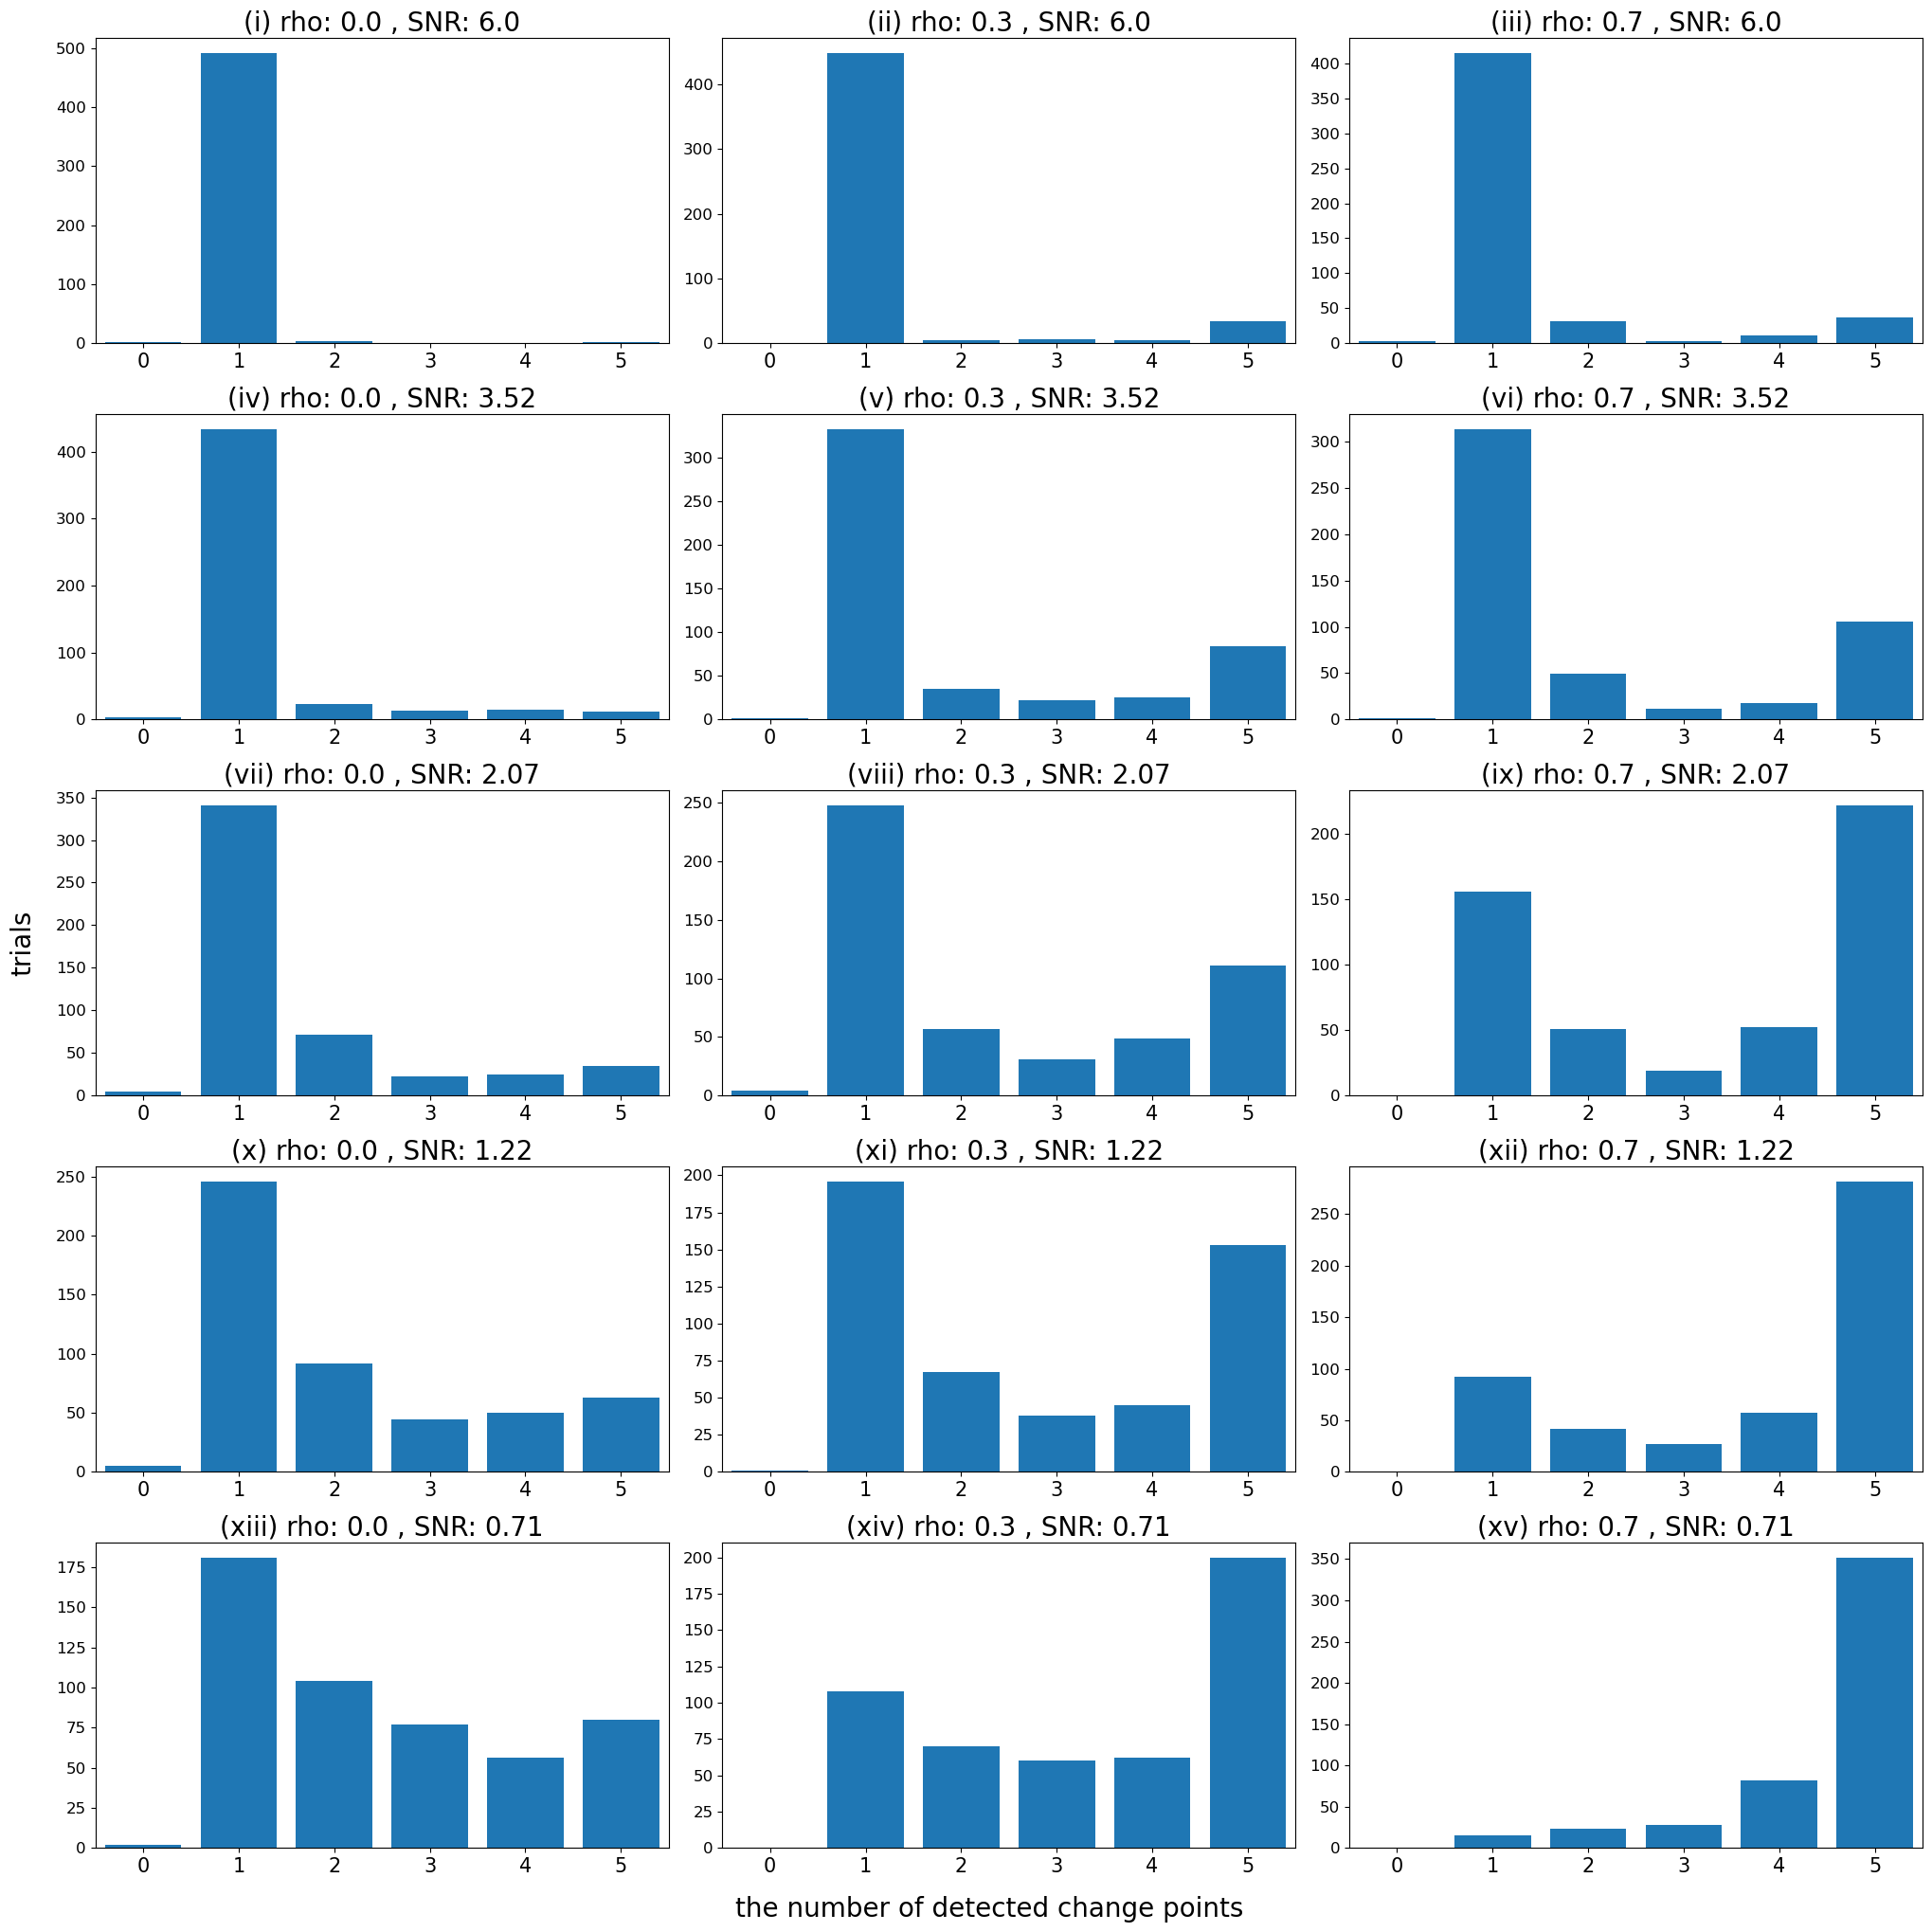

In [5]:
number_cps_plot(df, "Baseline")

# Our proposed methods: quadratic penalty

In [6]:
df_quad = pd.read_csv('results/simulation_five_variate_quadratic_penalty_20230429.csv')
df_quad = df_processing(df_quad)
df_quad

,Repitition,Time,rho,SNR,n,Optimality Gap,Change Points,correct_perfect,correct_partial,the number of detected change points,group
0,0,444.168769,0.0,6.00,1000,0.866193,[],False,0,0,"rho: 0.0 , SNR: 6.0"
1,0,448.369987,0.3,6.00,1000,0.549420,"[494, 506, 898]",False,0,3,"rho: 0.3 , SNR: 6.0"
2,0,449.259993,0.7,6.00,1000,0.884346,[],False,0,0,"rho: 0.7 , SNR: 6.0"
3,0,448.113686,0.0,3.52,1000,0.146673,[498],False,0,1,"rho: 0.0 , SNR: 3.52"
4,0,448.359044,0.3,3.52,1000,0.826816,[],False,0,0,"rho: 0.3 , SNR: 3.52"
...,...,...,...,...,...,...,...,...,...,...,...
7495,495,437.913422,0.7,0.71,1000,0.328537,"[499, 514]",False,1,2,"rho: 0.7 , SNR: 0.71"
7496,497,437.632818,0.7,0.71,1000,0.291916,[499],True,1,1,"rho: 0.7 , SNR: 0.71"
7497,498,435.656108,0.7,0.71,1000,0.331787,"[499, 822]",False,1,2,"rho: 0.7 , SNR: 0.71"
7498,496,435.326580,0.7,0.71,1000,0.452836,"[386, 736]",False,0,2,"rho: 0.7 , SNR: 0.71"


In [7]:
df_count_quad = accuracy_table(df_quad)
df_count_quad

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial
0,0.0,0.71,1000,30,57,0.060,0.114
1,0.0,1.22,1000,97,153,0.194,0.306
2,0.0,2.07,1000,231,259,0.462,0.518
3,0.0,3.52,1000,320,327,0.640,0.654
4,0.0,6.00,1000,372,373,0.744,0.746
5,0.3,0.71,1000,9,21,0.018,0.042
6,0.3,1.22,1000,25,48,0.050,0.096
7,0.3,2.07,1000,50,94,0.100,0.188
8,0.3,3.52,1000,131,184,0.262,0.368
9,0.3,6.00,1000,187,244,0.374,0.488


In [8]:
df_quad.loc[df_quad["group"] == "rho: 0.7 , SNR: 0.71", ]

,Repitition,Time,rho,SNR,n,Optimality Gap,Change Points,correct_perfect,correct_partial,the number of detected change points,group
14,0,461.555797,0.7,0.71,1000,0.610957,[],False,0,0,"rho: 0.7 , SNR: 0.71"
29,1,461.604167,0.7,0.71,1000,0.640959,[],False,0,0,"rho: 0.7 , SNR: 0.71"
44,2,461.317788,0.7,0.71,1000,0.617158,[988],False,0,1,"rho: 0.7 , SNR: 0.71"
59,3,461.794054,0.7,0.71,1000,0.602786,"[441, 457]",False,0,2,"rho: 0.7 , SNR: 0.71"
74,4,495.559718,0.7,0.71,1000,0.365535,[488],False,0,1,"rho: 0.7 , SNR: 0.71"
...,...,...,...,...,...,...,...,...,...,...,...
7495,495,437.913422,0.7,0.71,1000,0.328537,"[499, 514]",False,1,2,"rho: 0.7 , SNR: 0.71"
7496,497,437.632818,0.7,0.71,1000,0.291916,[499],True,1,1,"rho: 0.7 , SNR: 0.71"
7497,498,435.656108,0.7,0.71,1000,0.331787,"[499, 822]",False,1,2,"rho: 0.7 , SNR: 0.71"
7498,496,435.326580,0.7,0.71,1000,0.452836,"[386, 736]",False,0,2,"rho: 0.7 , SNR: 0.71"


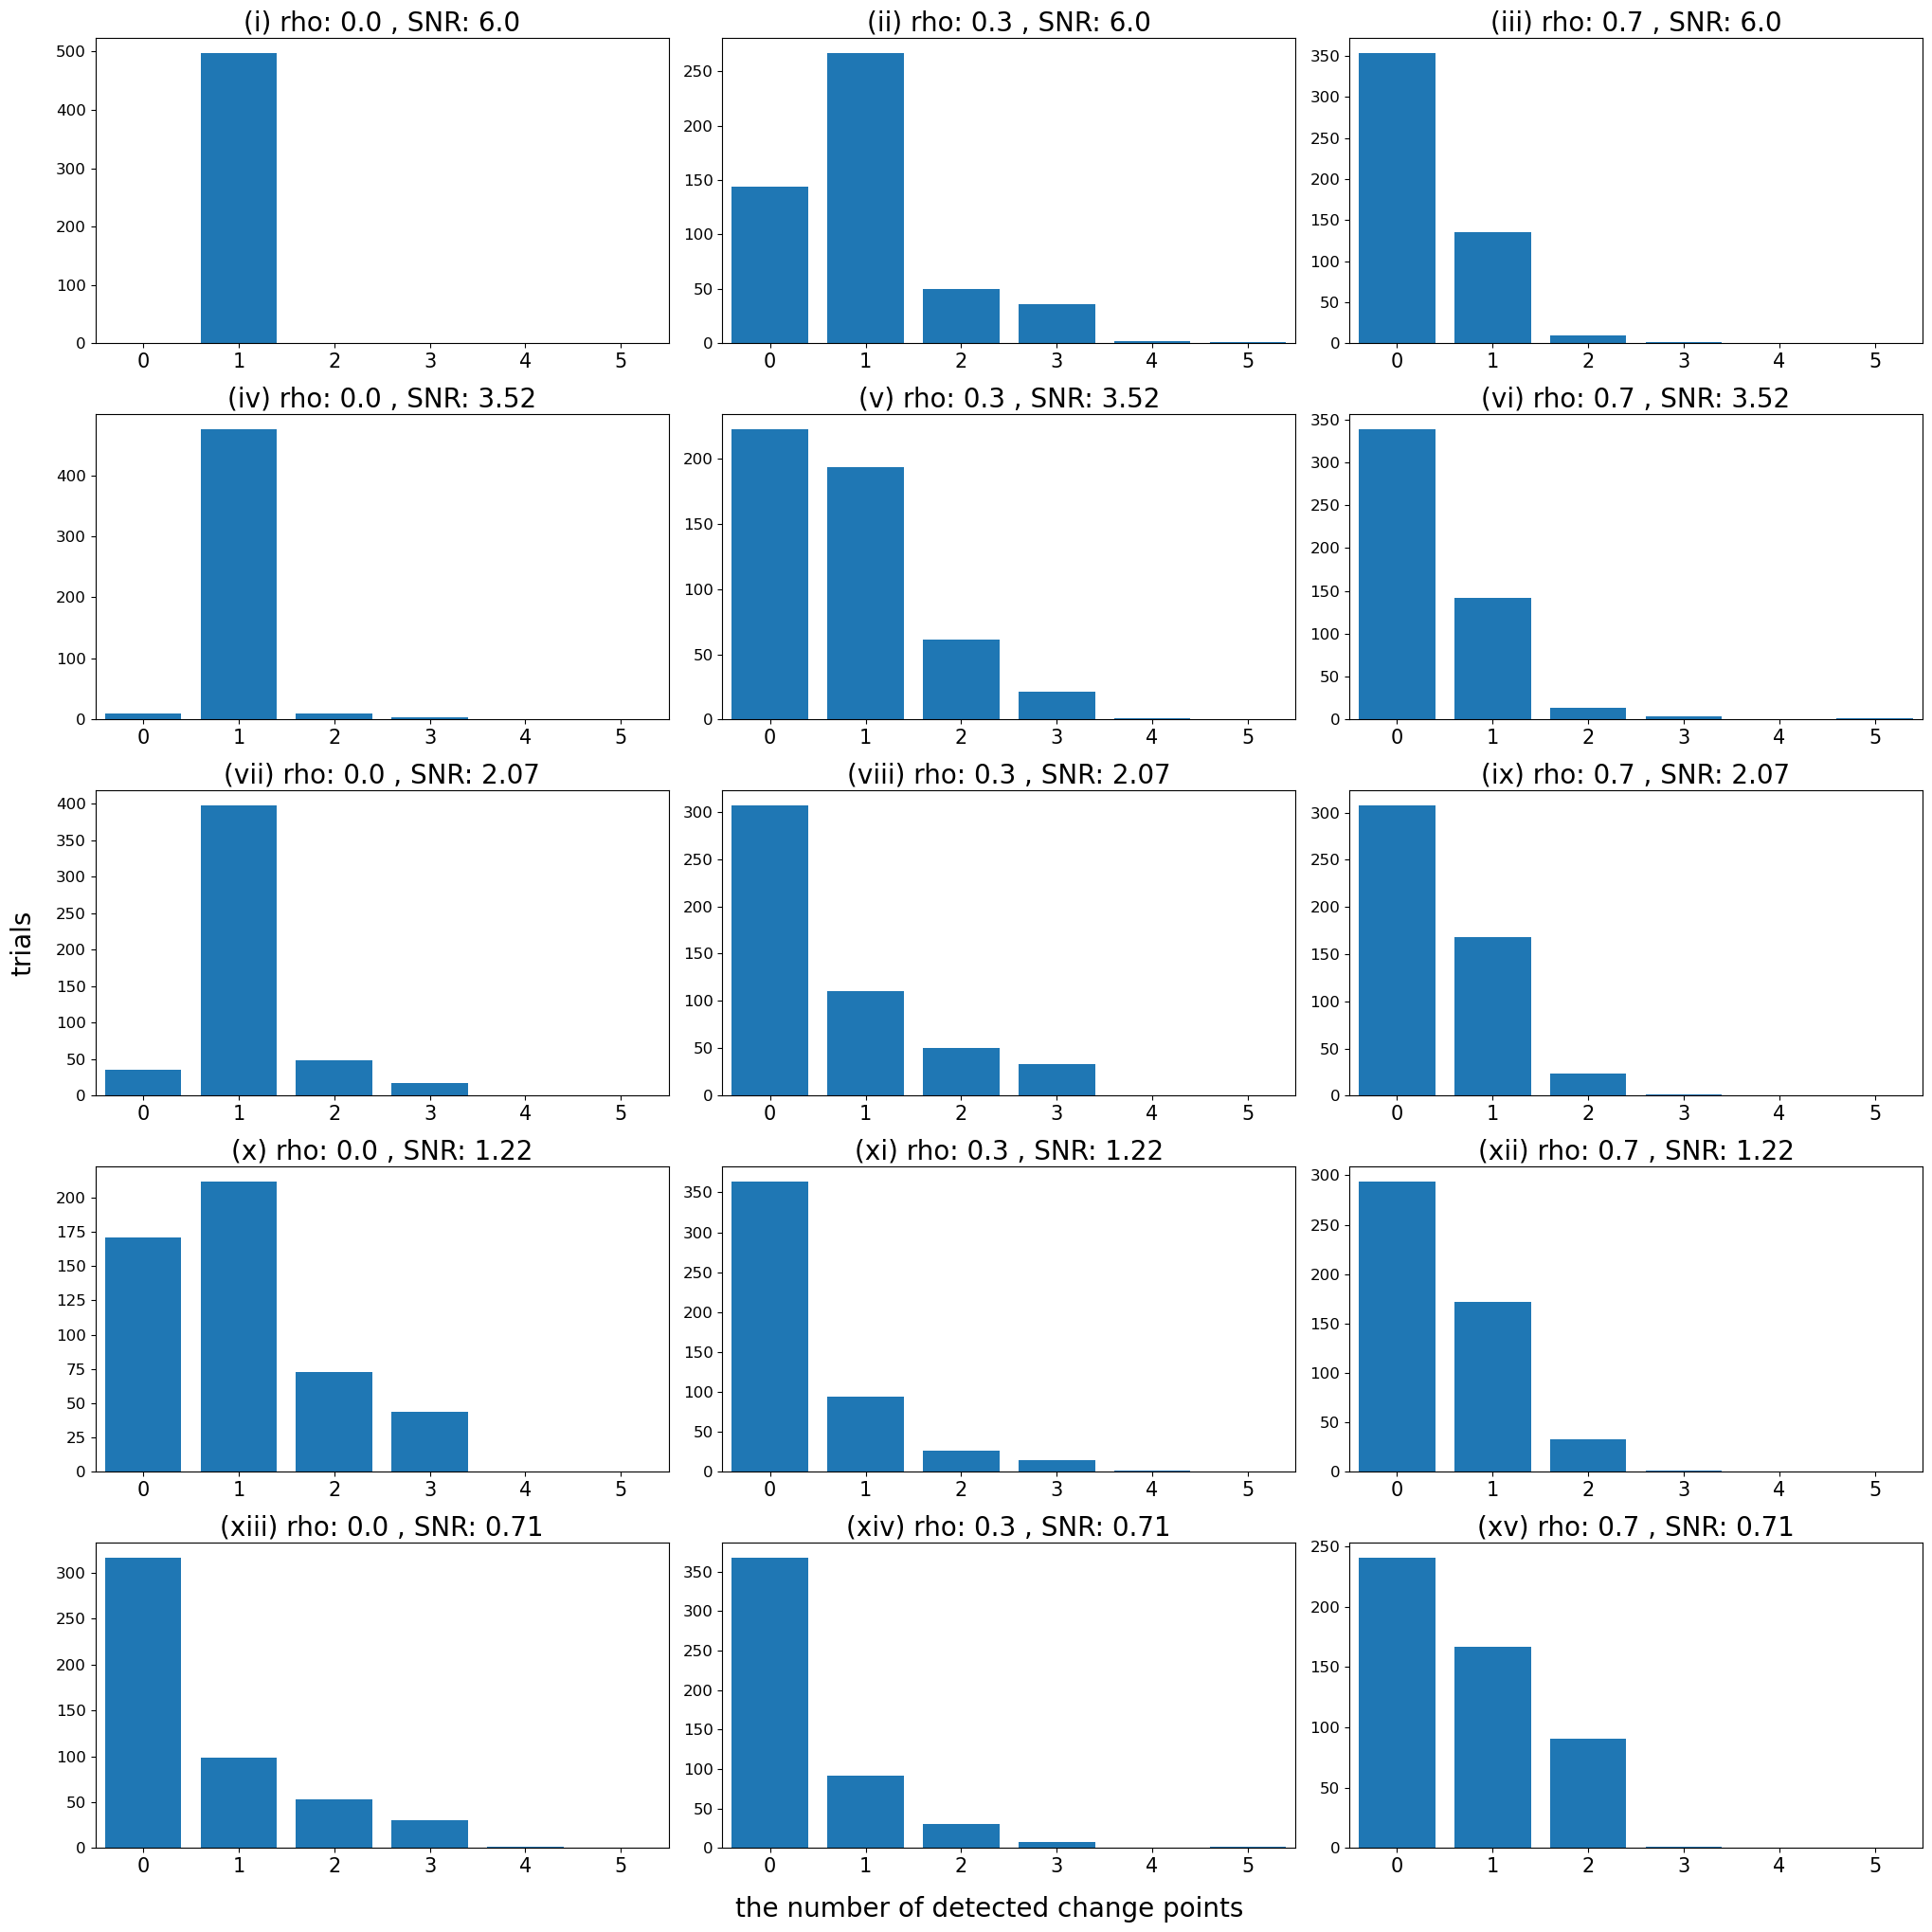

In [9]:
number_cps_plot(df_quad, "Squared Penalty")

# Our proposed methods: squared BigM

In [10]:
df_sqBigM = pd.read_csv('results/simulation_five_variate_squared_bigM_20230504.csv')
df_sqBigM = df_processing(df_sqBigM)
df_sqBigM

,Repitition,Time,rho,SNR,n,Optimality Gap,Change Points,correct_perfect,correct_partial,the number of detected change points,group
0,0,429.520446,0.0,6.00,1000,0.891009,"[39, 140, 968]",False,0,3,"rho: 0.0 , SNR: 6.0"
1,0,431.832278,0.3,6.00,1000,0.408385,[499],True,1,1,"rho: 0.3 , SNR: 6.0"
2,0,431.928070,0.7,6.00,1000,0.485914,[500],False,0,1,"rho: 0.7 , SNR: 6.0"
3,0,432.113854,0.0,3.52,1000,0.397695,[498],False,0,1,"rho: 0.0 , SNR: 3.52"
4,0,432.433904,0.3,3.52,1000,0.409954,[499],True,1,1,"rho: 0.3 , SNR: 3.52"
...,...,...,...,...,...,...,...,...,...,...,...
7495,496,433.679098,0.7,0.71,1000,0.196614,"[3, 368, 376, 499, 670]",False,1,5,"rho: 0.7 , SNR: 0.71"
7496,497,421.371242,0.7,0.71,1000,0.174268,"[19, 499, 920]",False,1,3,"rho: 0.7 , SNR: 0.71"
7497,498,421.445217,0.7,0.71,1000,0.217831,"[74, 498]",False,0,2,"rho: 0.7 , SNR: 0.71"
7498,499,421.422608,0.7,0.71,1000,0.209654,"[439, 499, 604, 818, 942]",False,1,5,"rho: 0.7 , SNR: 0.71"


In [11]:
df_count_sqBigM = accuracy_table(df_sqBigM)
df_count_sqBigM

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial
0,0.0,0.71,1000,7,16,0.014,0.032
1,0.0,1.22,1000,62,83,0.124,0.166
2,0.0,2.07,1000,107,111,0.214,0.222
3,0.0,3.52,1000,189,193,0.378,0.386
4,0.0,6.00,1000,217,222,0.434,0.444
5,0.3,0.71,1000,7,15,0.014,0.030
6,0.3,1.22,1000,30,52,0.060,0.104
7,0.3,2.07,1000,80,97,0.160,0.194
8,0.3,3.52,1000,179,181,0.358,0.362
9,0.3,6.00,1000,205,207,0.410,0.414


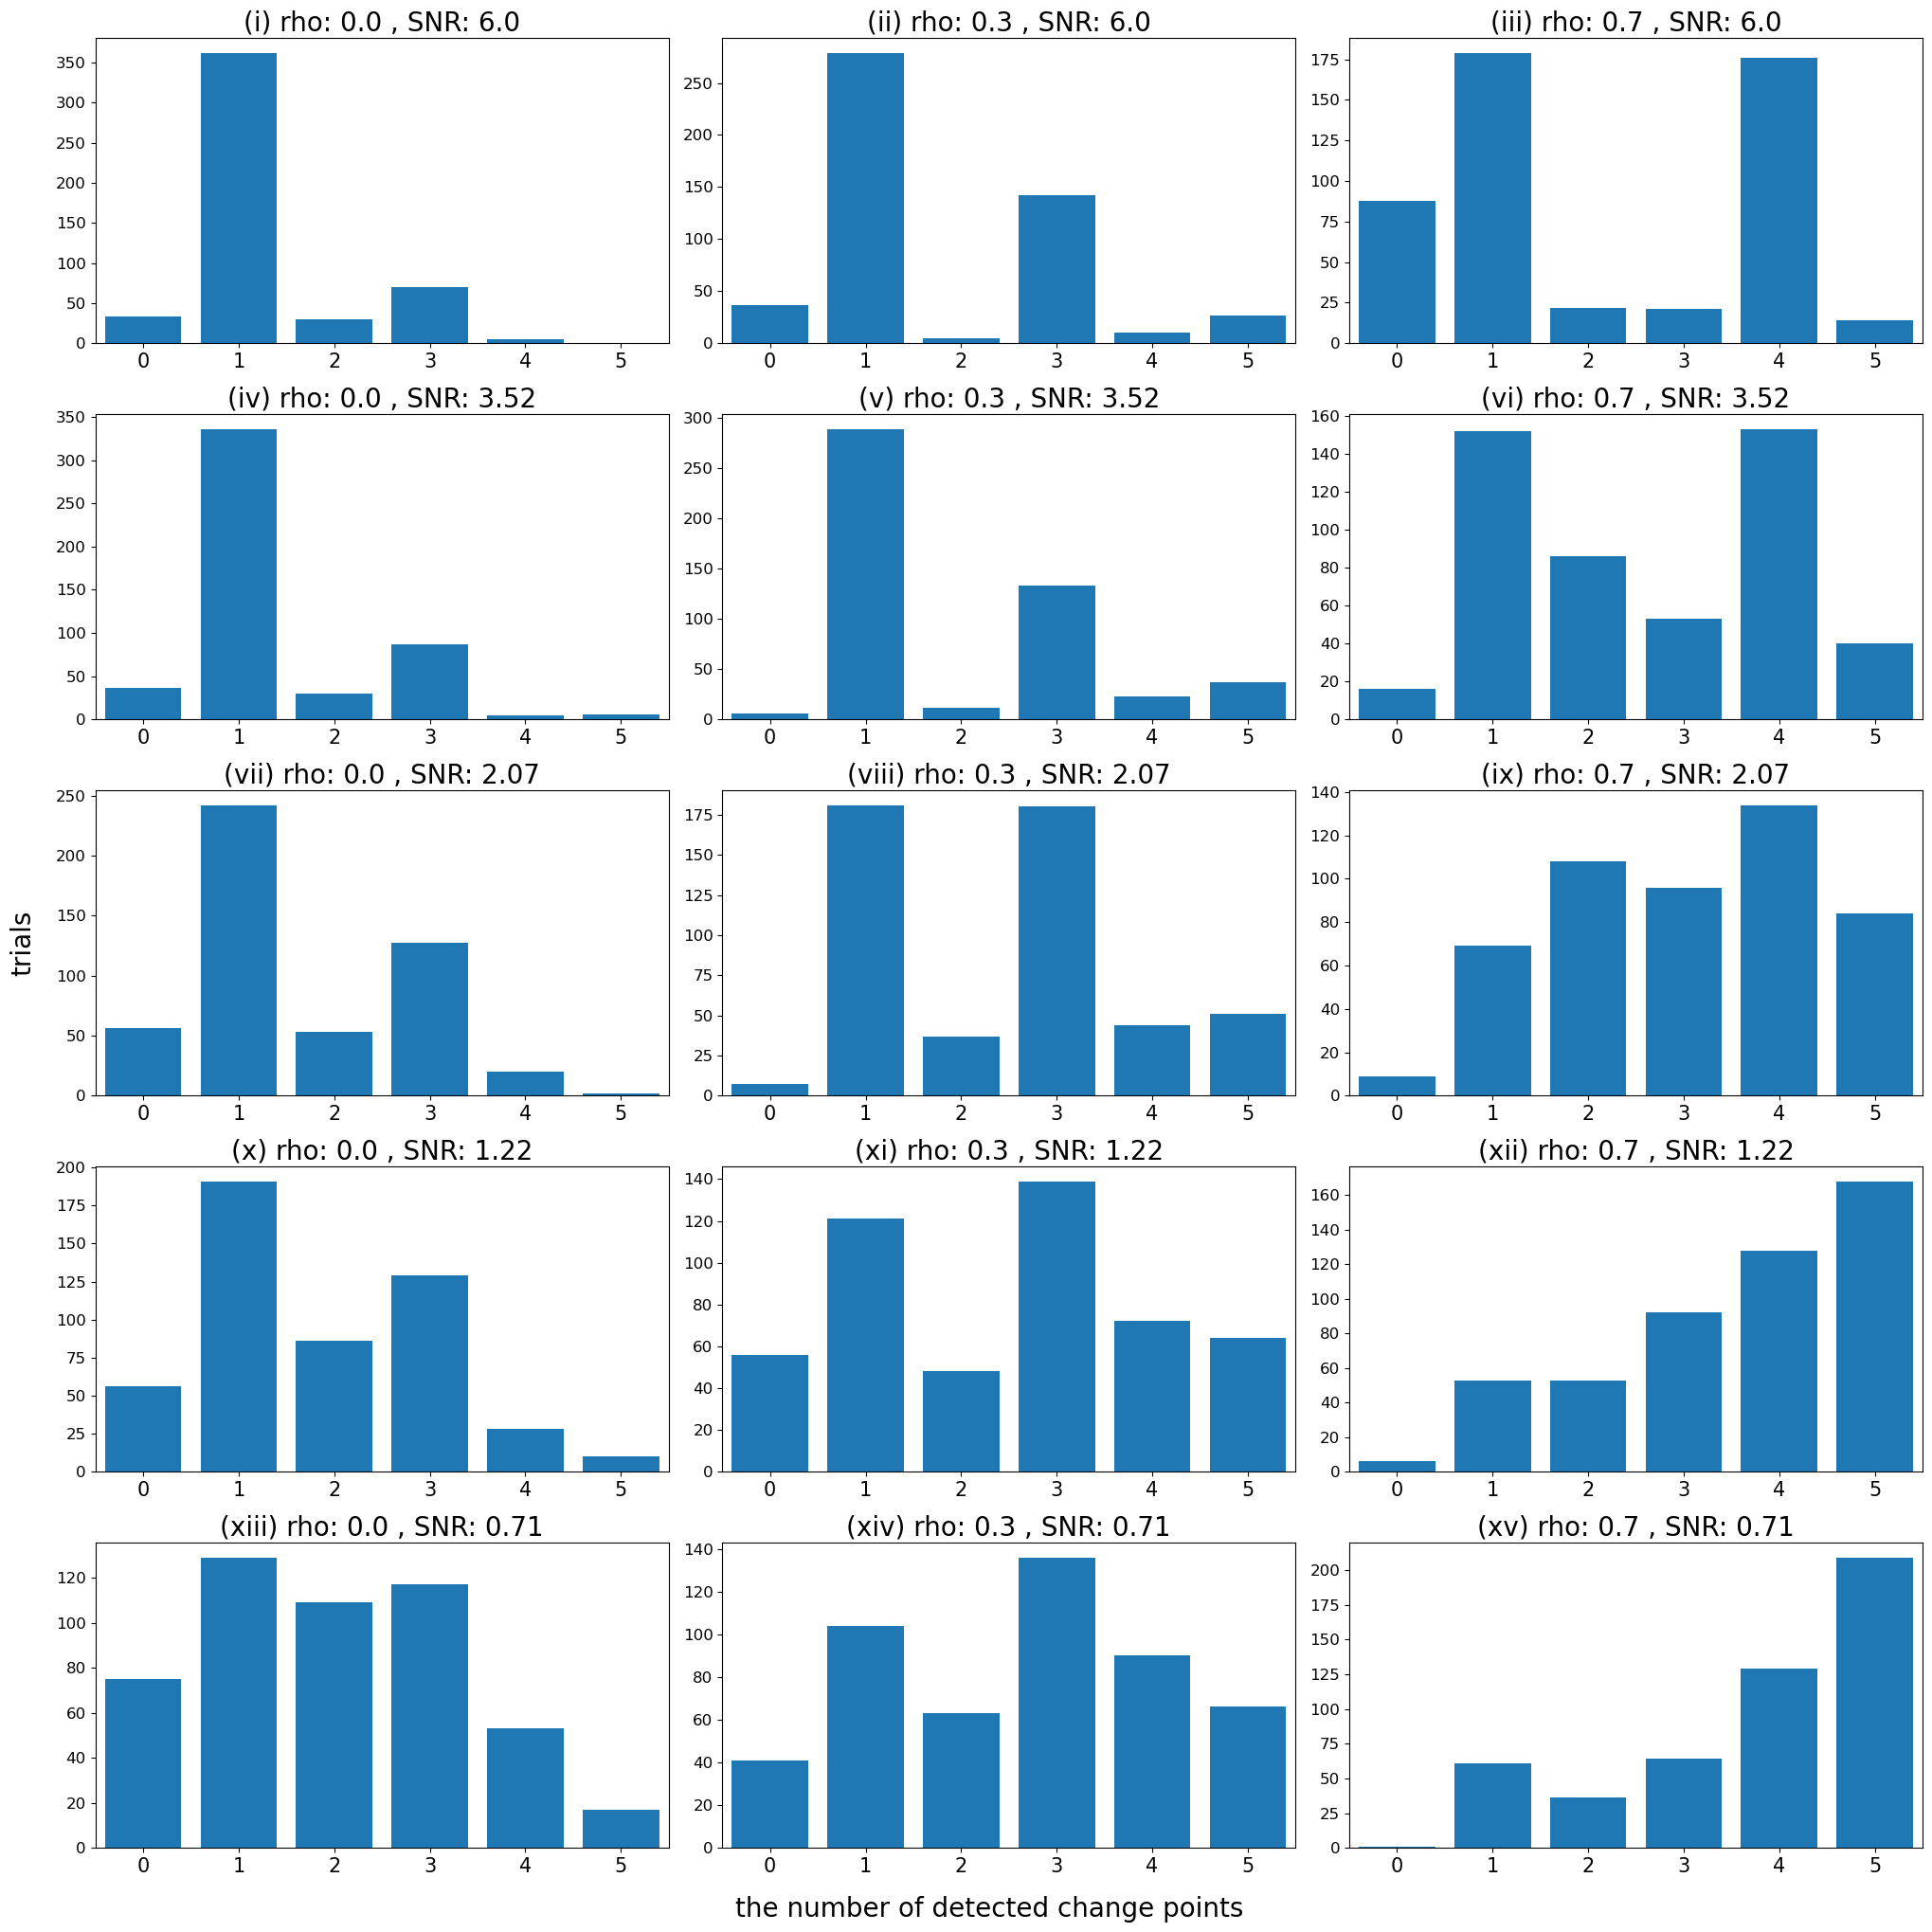

In [12]:
number_cps_plot(df_sqBigM, "Squared BigM")

# Our proposed methods: l2 regularization

In [13]:
df_reg = pd.read_csv('results/simulation_five_variate_l2_reg_20230508.csv')
df_reg = df_processing(df_reg)
df_reg

,Repitition,Time,rho,SNR,n,Optimality Gap,Change Points,correct_perfect,correct_partial,the number of detected change points,group
0,6,389.600252,0.0,6.00,1000,0.000000,[499],True,1,1,"rho: 0.0 , SNR: 6.0"
1,0,471.642053,0.0,6.00,1000,0.071262,[499],True,1,1,"rho: 0.0 , SNR: 6.0"
2,7,471.865008,0.0,6.00,1000,0.128342,[498],False,0,1,"rho: 0.0 , SNR: 6.0"
3,3,471.916477,0.0,6.00,1000,0.095217,[499],True,1,1,"rho: 0.0 , SNR: 6.0"
4,2,472.039211,0.0,6.00,1000,0.097696,[499],True,1,1,"rho: 0.0 , SNR: 6.0"
...,...,...,...,...,...,...,...,...,...,...,...
7495,497,441.127204,0.7,0.71,1000,0.412199,"[490, 495, 564, 571, 574]",False,0,5,"rho: 0.7 , SNR: 0.71"
7496,498,433.811840,0.3,0.71,1000,0.283677,[499],True,1,1,"rho: 0.3 , SNR: 0.71"
7497,499,433.830783,0.3,0.71,1000,0.307032,[502],False,0,1,"rho: 0.3 , SNR: 0.71"
7498,498,430.479273,0.7,0.71,1000,0.384360,"[499, 570]",False,1,2,"rho: 0.7 , SNR: 0.71"


In [14]:
df_count_reg = accuracy_table(df_reg)
df_count_reg

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial
0,0.0,0.71,1000,63,78,0.126,0.156
1,0.0,1.22,1000,96,115,0.192,0.230
2,0.0,2.07,1000,171,186,0.342,0.372
3,0.0,3.52,1000,300,300,0.600,0.600
4,0.0,6.00,1000,367,367,0.734,0.734
5,0.3,0.71,1000,62,92,0.124,0.184
6,0.3,1.22,1000,112,139,0.224,0.278
7,0.3,2.07,1000,169,193,0.338,0.386
8,0.3,3.52,1000,230,235,0.460,0.470
9,0.3,6.00,1000,333,337,0.666,0.674


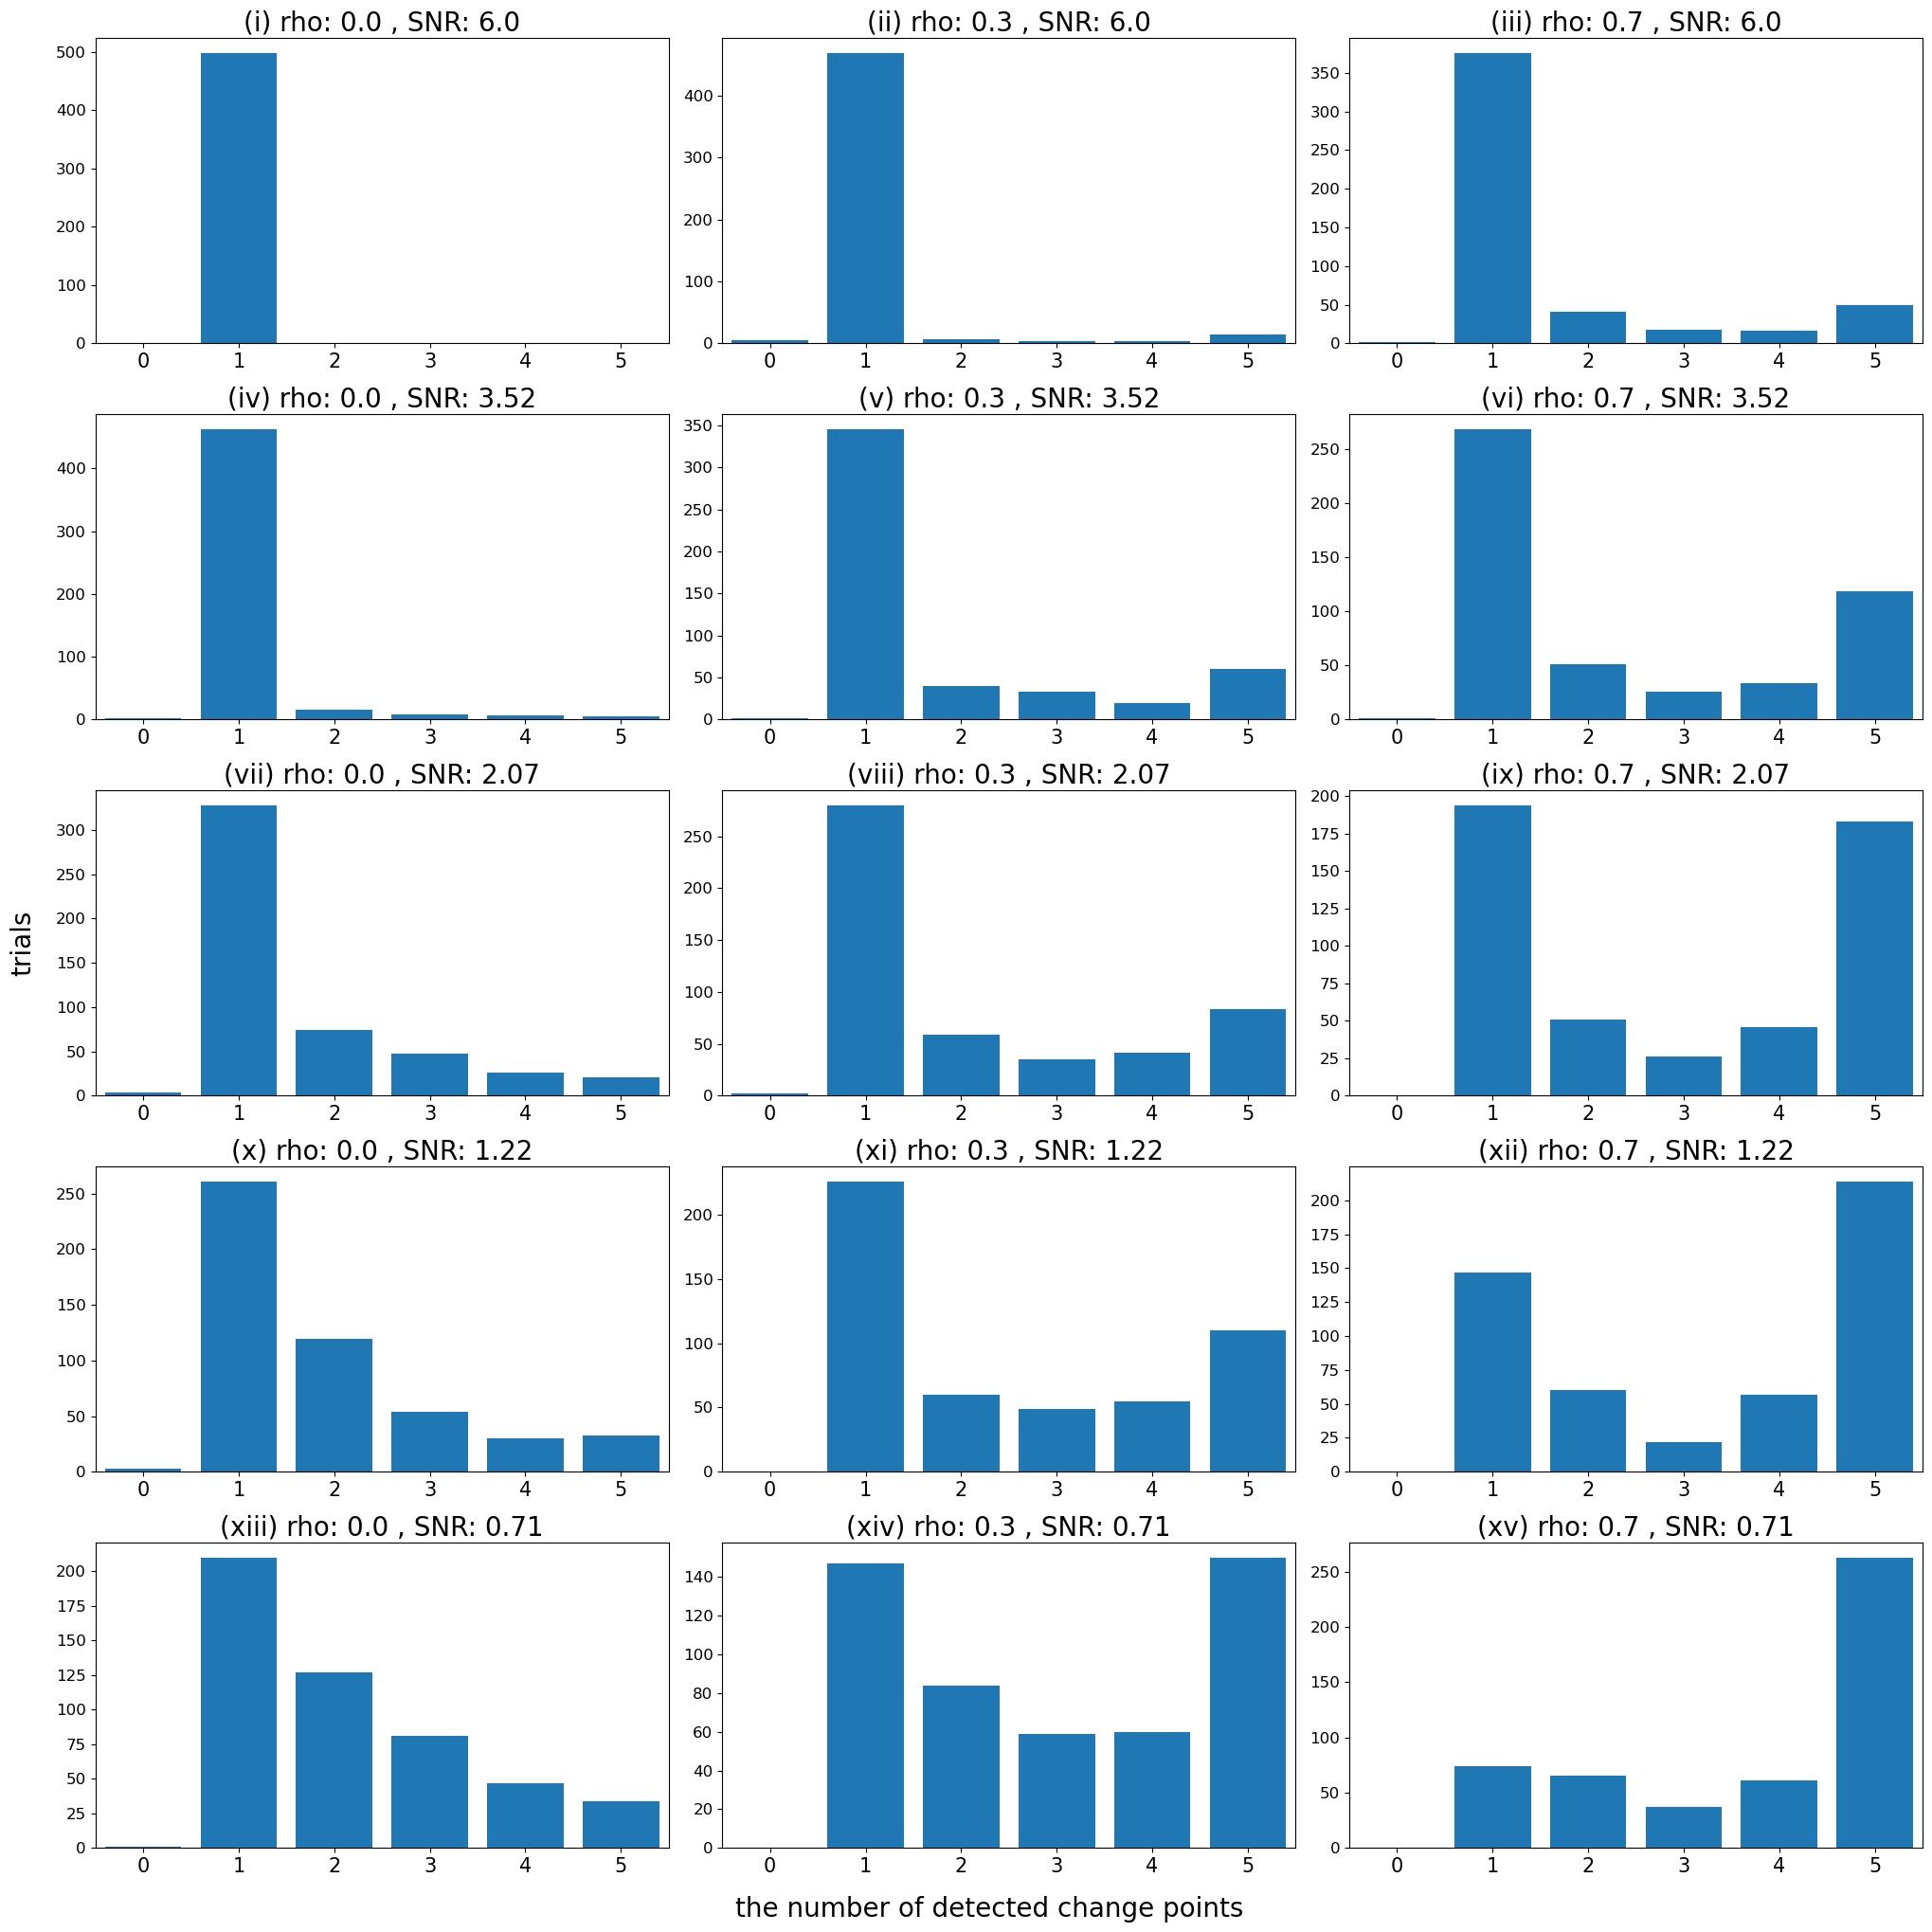

In [15]:
number_cps_plot(df_reg, "l2 regularization")

# Benchmarks: Bai and Perron

In [16]:
df_BP= pd.read_csv('results/simulation_five_variate_benchmark_BP_20230408.csv')

# correct_perfect: detect only 499
df_BP['correct_perfect'] = False
df_BP.loc[df_BP['Location of CP'] == "[500, 1000]", 'correct_perfect'] = True

# correct partial: result include 499, it might include other change points.
df_BP['correct_partial'] = df_BP["Location of CP"].str.count("500")

# group name
df_BP["group"] = "rho: " + df_BP["rho"].astype(str) + " , SNR: " + df_BP["SNR"].astype(str)
df_BP

,Repitition,Time,rho,SNR,n,The number of CP,Location of CP,correct_perfect,correct_partial,group
0,0,242.878282,0.0,6.00,1000,1,"[500, 1000]",True,1,"rho: 0.0 , SNR: 6.0"
1,6,243.477018,0.0,6.00,1000,1,"[500, 1000]",True,1,"rho: 0.0 , SNR: 6.0"
2,2,245.595690,0.0,6.00,1000,1,"[500, 1000]",True,1,"rho: 0.0 , SNR: 6.0"
3,3,245.595745,0.0,6.00,1000,1,"[500, 1000]",True,1,"rho: 0.0 , SNR: 6.0"
4,5,245.595867,0.0,6.00,1000,1,"[500, 1000]",True,1,"rho: 0.0 , SNR: 6.0"
...,...,...,...,...,...,...,...,...,...,...
7495,498,144.576718,0.3,0.71,1000,1,"[499, 1000]",False,0,"rho: 0.3 , SNR: 0.71"
7496,499,143.618568,0.3,0.71,1000,1,"[501, 1000]",False,0,"rho: 0.3 , SNR: 0.71"
7497,498,129.368120,0.7,0.71,1000,1,"[497, 1000]",False,0,"rho: 0.7 , SNR: 0.71"
7498,497,131.325467,0.7,0.71,1000,1,"[506, 1000]",False,0,"rho: 0.7 , SNR: 0.71"


## Accuracy

Findings:

- Higher SNR, higher accuracy
- HIgher rho, less accuracy relatively
- The estimated nnumber of CPD seems to be 1 for all sampling.

In [17]:
df_BP_count = df_BP[["rho", "SNR", "n", "correct_perfect", "correct_partial"]].groupby(["rho", "SNR", "n"]).sum().reset_index()
df_BP_count["accuracy_perfect"] = df_BP_count["correct_perfect"]/500
df_BP_count["accuracy_partial"] = df_BP_count["correct_partial"]/500
df_BP_count

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial
0,0.0,0.71,1000,196,196,0.392,0.392
1,0.0,1.22,1000,251,251,0.502,0.502
2,0.0,2.07,1000,303,303,0.606,0.606
3,0.0,3.52,1000,340,340,0.680,0.680
4,0.0,6.00,1000,374,374,0.748,0.748
5,0.3,0.71,1000,194,194,0.388,0.388
6,0.3,1.22,1000,239,239,0.478,0.478
7,0.3,2.07,1000,299,299,0.598,0.598
8,0.3,3.52,1000,331,331,0.662,0.662
9,0.3,6.00,1000,372,372,0.744,0.744


In [18]:
df_BP_count.sort_values("accuracy_partial", ascending=False)

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial
4,0.0,6.00,1000,374,374,0.748,0.748
9,0.3,6.00,1000,372,372,0.744,0.744
14,0.7,6.00,1000,372,372,0.744,0.744
3,0.0,3.52,1000,340,340,0.680,0.680
8,0.3,3.52,1000,331,331,0.662,0.662
13,0.7,3.52,1000,329,329,0.658,0.658
2,0.0,2.07,1000,303,303,0.606,0.606
7,0.3,2.07,1000,299,299,0.598,0.598
12,0.7,2.07,1000,285,285,0.570,0.570
11,0.7,1.22,1000,262,262,0.524,0.524


## Estimated number of change points

Findings:

- All model detect 1 change point.

In [19]:
df_BP["The number of CP"].unique()

array([1])

## Optimality Gap: the distibution of the estimated location

Findings:

- Smaller SNR, wider range

In [20]:
df_BP['location'] = df_BP["Location of CP"].str[1:4].astype(int)
df_BP.head()

,Repitition,Time,rho,SNR,n,The number of CP,Location of CP,correct_perfect,correct_partial,group,location
0,0,242.878282,0.0,6.0,1000,1,"[500, 1000]",True,1,"rho: 0.0 , SNR: 6.0",500
1,6,243.477018,0.0,6.0,1000,1,"[500, 1000]",True,1,"rho: 0.0 , SNR: 6.0",500
2,2,245.595690,0.0,6.0,1000,1,"[500, 1000]",True,1,"rho: 0.0 , SNR: 6.0",500
3,3,245.595745,0.0,6.0,1000,1,"[500, 1000]",True,1,"rho: 0.0 , SNR: 6.0",500
4,5,245.595867,0.0,6.0,1000,1,"[500, 1000]",True,1,"rho: 0.0 , SNR: 6.0",500


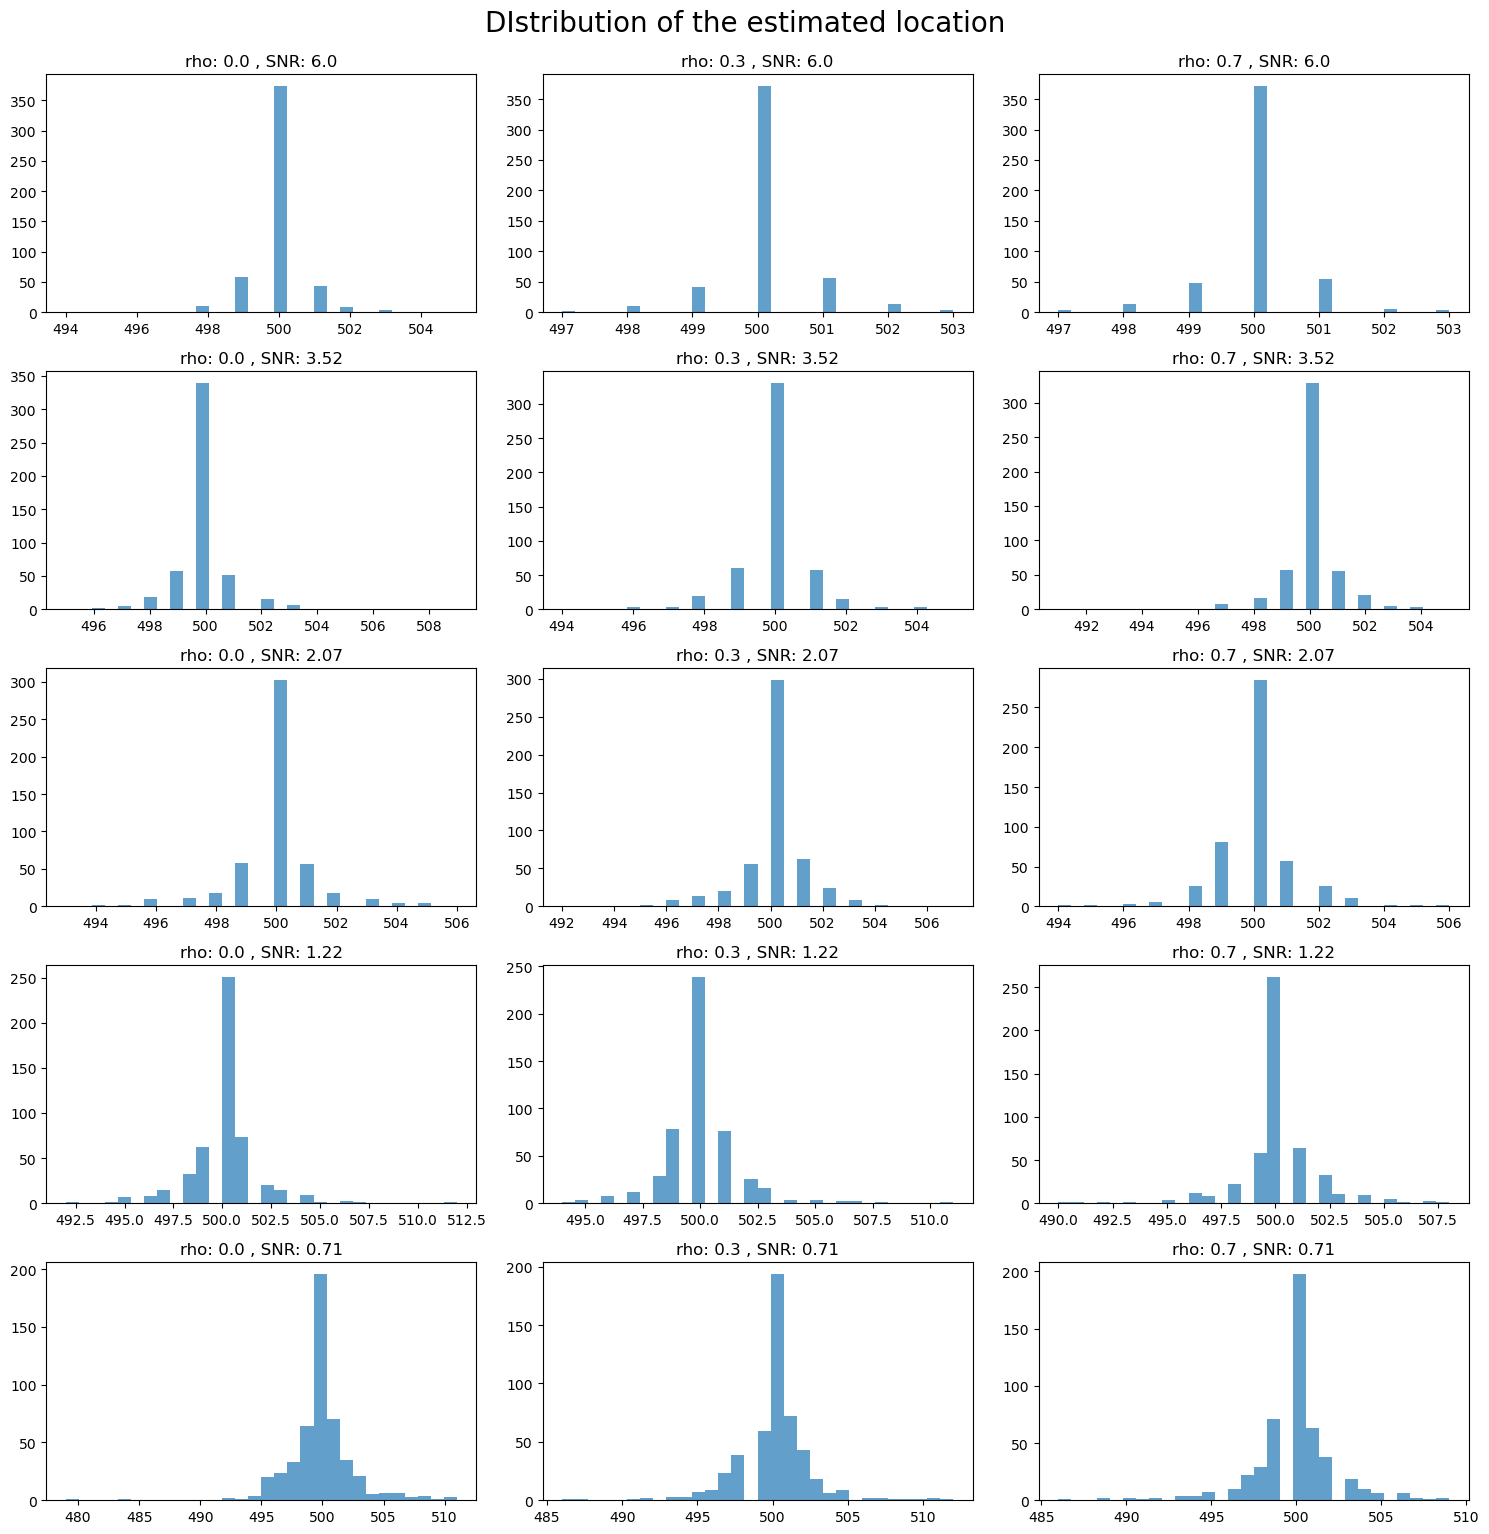

In [21]:
group_list = df_BP["group"].unique()

min_num = df_BP.location.min()
max_num = df_BP.location.max()

fig, ax = plt.subplots(5, 3, figsize=(15, 15))

for g, ax in zip(group_list, ax.ravel()):
    ax.hist(df_BP.loc[df_BP["group"] == g, "location"], alpha = 0.7, bins = 30)
    #ax.set_xticks(np.linspace(480, 520, 5))
    ax.set_title(g)
    

fig.tight_layout()
fig.suptitle("DIstribution of the estimated location", fontsize=20).set_y(1.02)
plt.show()

# Benchmarks: Bayesian approach

In [22]:
df_bayes_1 = pd.read_csv('results/result_bayes_rho_03_SNR_122_20230416.csv')
df_bayes_2 = pd.read_csv('results/result_bayes_rho_03_SNR_071_20230501.csv')
df_bayes = pd.concat([df_bayes_1, df_bayes_2], ignore_index = True)
df_bayes["cps"] = df_bayes.cp1.astype(str) + "," + df_bayes.cp2.astype(str) + "," + df_bayes.cp3.astype(str) + "," + df_bayes.cp4.astype(str) + "," + df_bayes.cp5.astype(str) 
# correct change point is 501
# accuracy_partial : the change points with top5 highest posterior probability include 501
# accuracy_perfect: change point with the highest posterior probability is 501
df_bayes["accuracy_partial"] = df_bayes["cps"].str.count("501")
df_bayes["accuracy_perfect"] = df_bayes["cp1"].astype(str).str.count("501")
df_bayes_count = df_bayes.groupby(["rho", "SNR", "n"]).mean().reset_index()[["rho", "SNR", "n", "accuracy_partial", "accuracy_perfect"]]
df_bayes_count

,rho,SNR,n,accuracy_partial,accuracy_perfect
0,0.3,0.71,1000,0.204,0.036
1,0.3,1.22,1000,0.422,0.104


# Comparison

In [23]:
df_count["method"] = "Baseline"
df_BP_count["method"] = "BP"
df_plot = pd.concat([df_count, df_BP_count], ignore_index = True)

df_plot["group"] = "rho: " + df_plot["rho"].astype(str) + " , SNR: " + df_plot["SNR"].astype(str)
df_plot

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial,method,group
0,0.0,0.71,1000,81,97,0.162,0.194,Baseline,"rho: 0.0 , SNR: 0.71"
1,0.0,1.22,1000,121,143,0.242,0.286,Baseline,"rho: 0.0 , SNR: 1.22"
2,0.0,2.07,1000,206,219,0.412,0.438,Baseline,"rho: 0.0 , SNR: 2.07"
3,0.0,3.52,1000,261,265,0.522,0.530,Baseline,"rho: 0.0 , SNR: 3.52"
4,0.0,6.00,1000,364,366,0.728,0.732,Baseline,"rho: 0.0 , SNR: 6.0"
5,0.3,0.71,1000,51,91,0.102,0.182,Baseline,"rho: 0.3 , SNR: 0.71"
6,0.3,1.22,1000,112,146,0.224,0.292,Baseline,"rho: 0.3 , SNR: 1.22"
7,0.3,2.07,1000,164,195,0.328,0.390,Baseline,"rho: 0.3 , SNR: 2.07"
8,0.3,3.52,1000,246,256,0.492,0.512,Baseline,"rho: 0.3 , SNR: 3.52"
9,0.3,6.00,1000,334,337,0.668,0.674,Baseline,"rho: 0.3 , SNR: 6.0"


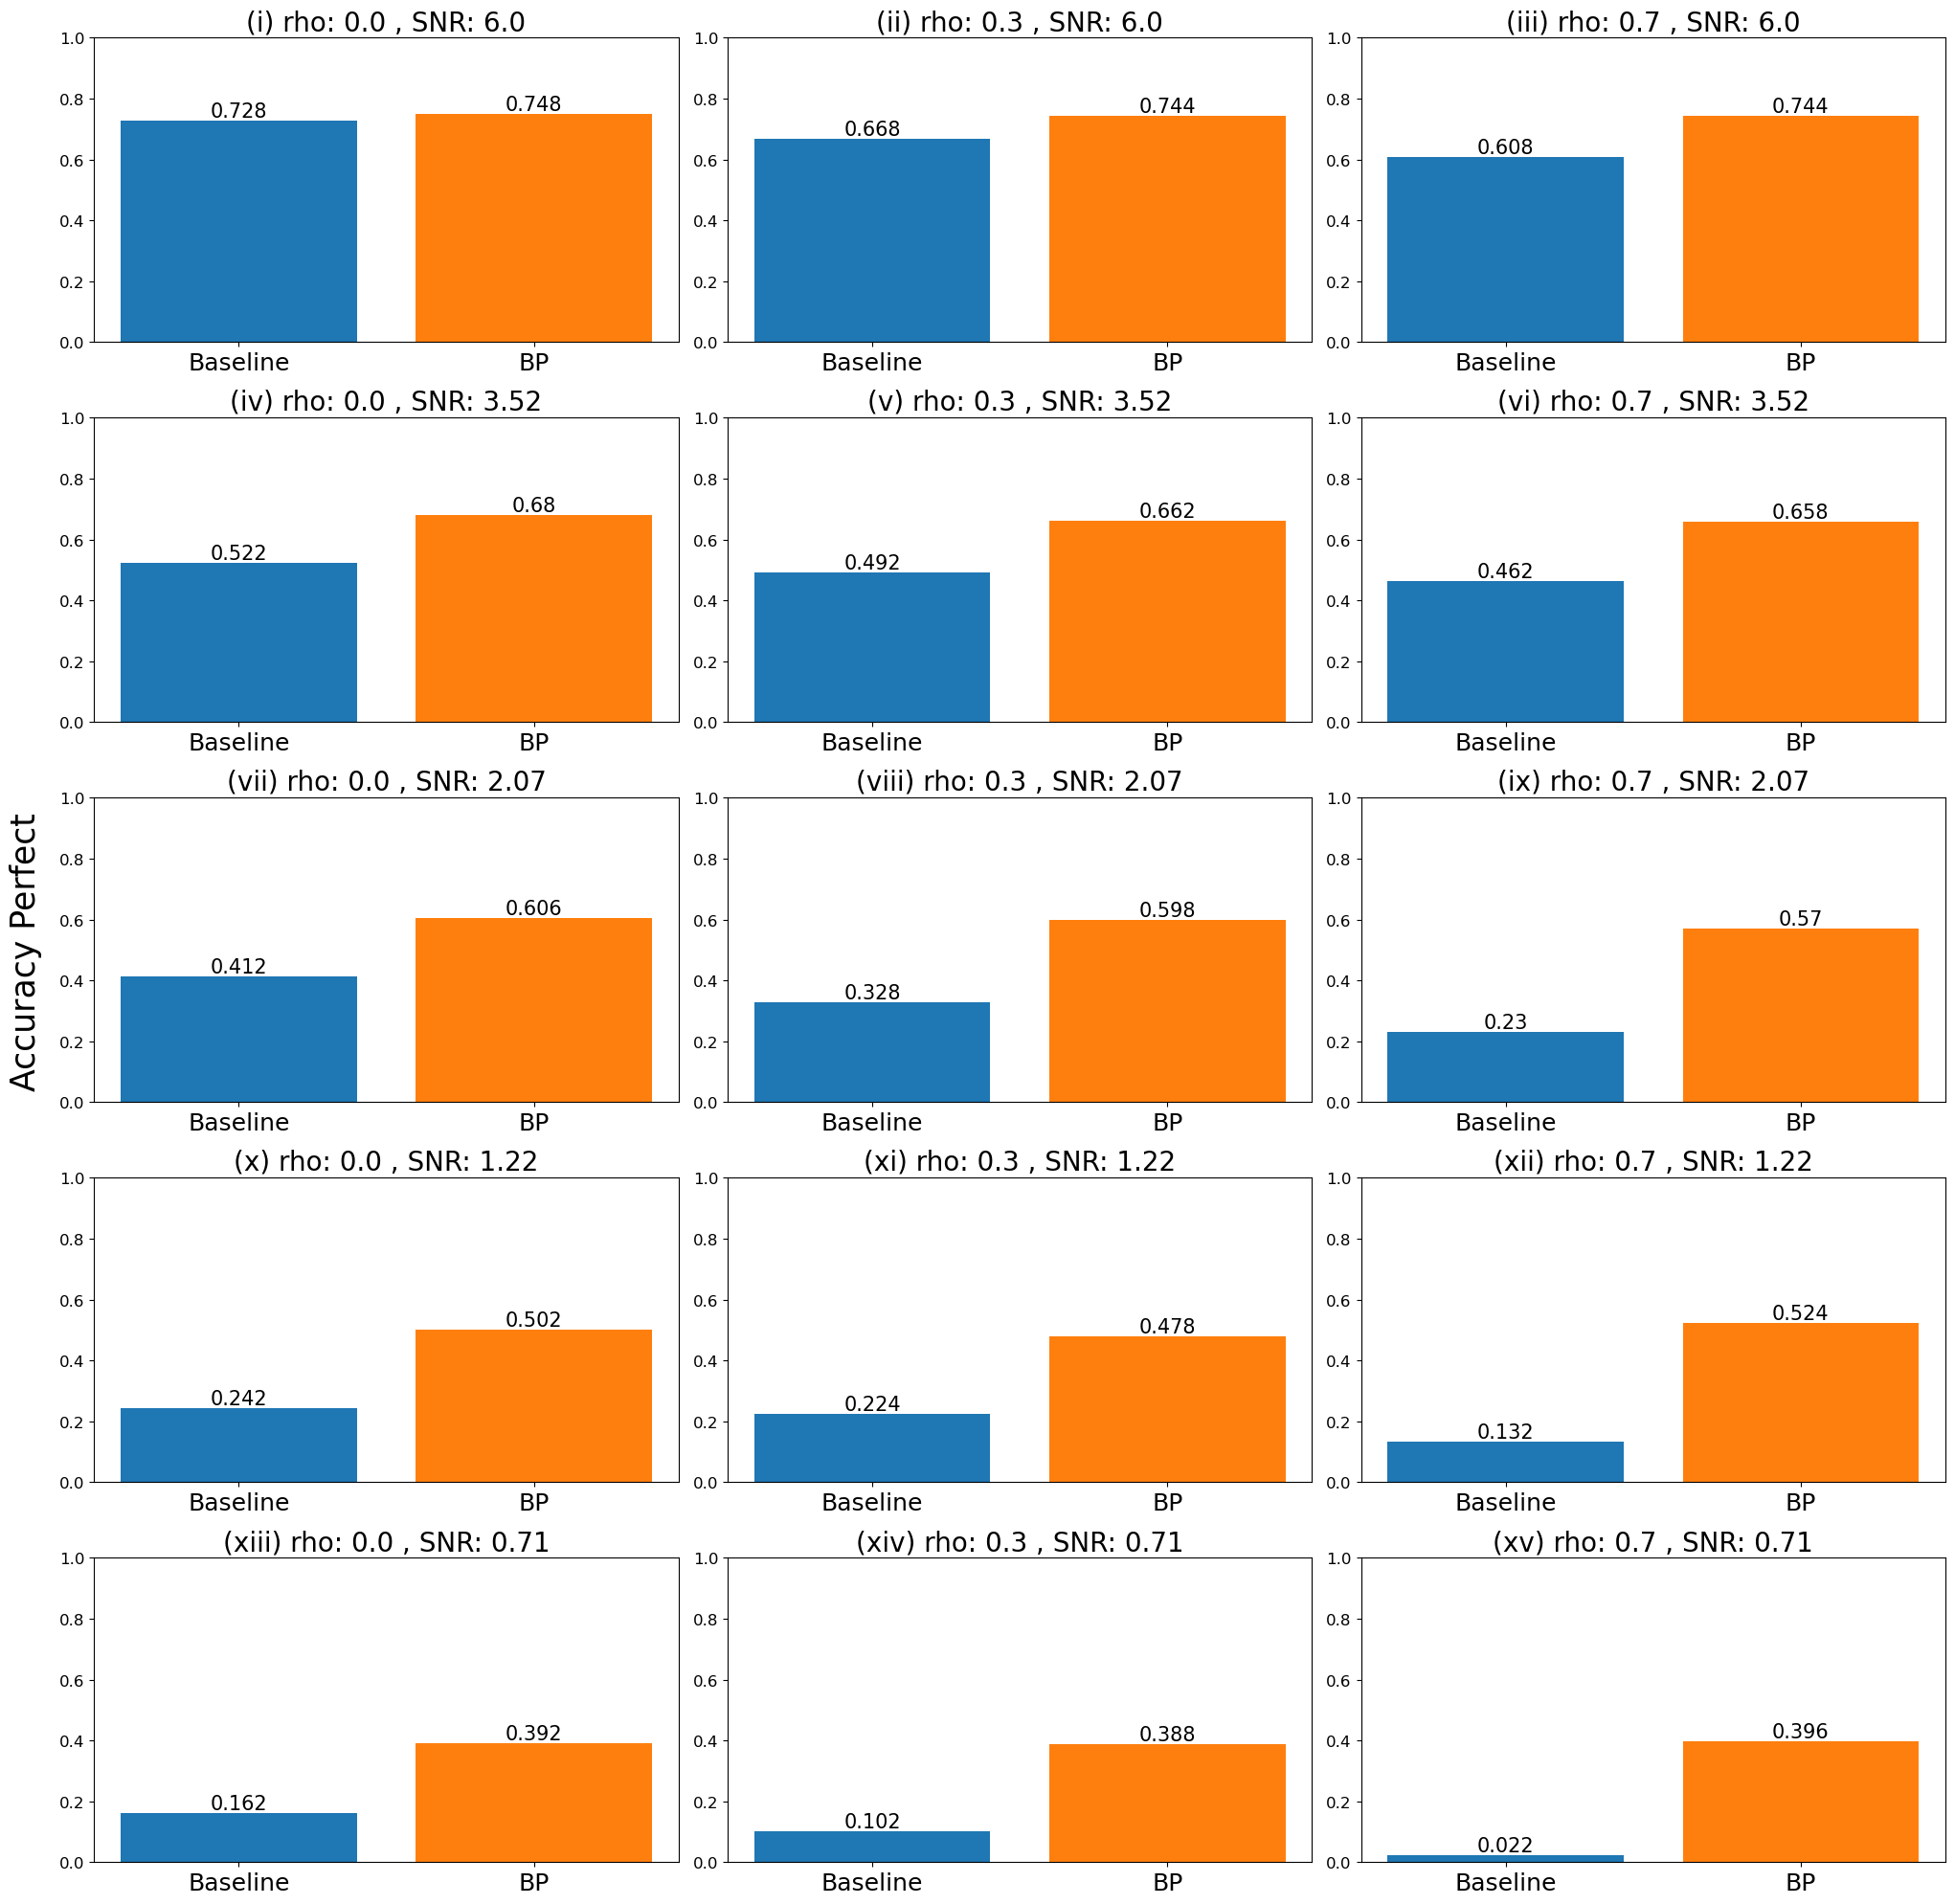

In [24]:
fig, ax = plt.subplots(5, 3, figsize=(20, 20))

i = -1
for g, ax in zip(group_list, ax.ravel()):
    i = i+1
    p = ax.bar(df_plot.loc[df_plot["group"] == g, "method"],
         df_plot.loc[df_plot["group"] == g, "accuracy_perfect"], color = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"])
    ax.set_yticks([0.0, 0.2, 0.4, 0.6,0.8, 1.0])
    ax.bar_label(p, label_type = "edge", fontsize = 15)
    ax.set_title( "(" + greek_list[i] + ") "+ g, fontsize = 20)
    ax.tick_params(axis='x', which='major', labelsize=18)
    ax.tick_params(axis='y', which='major', labelsize=12)
    

fig.tight_layout()
fig.text(-0.01, 0.5, 'Accuracy Perfect', va='center', ha='center', rotation='vertical', fontsize = 25)
plt.show()

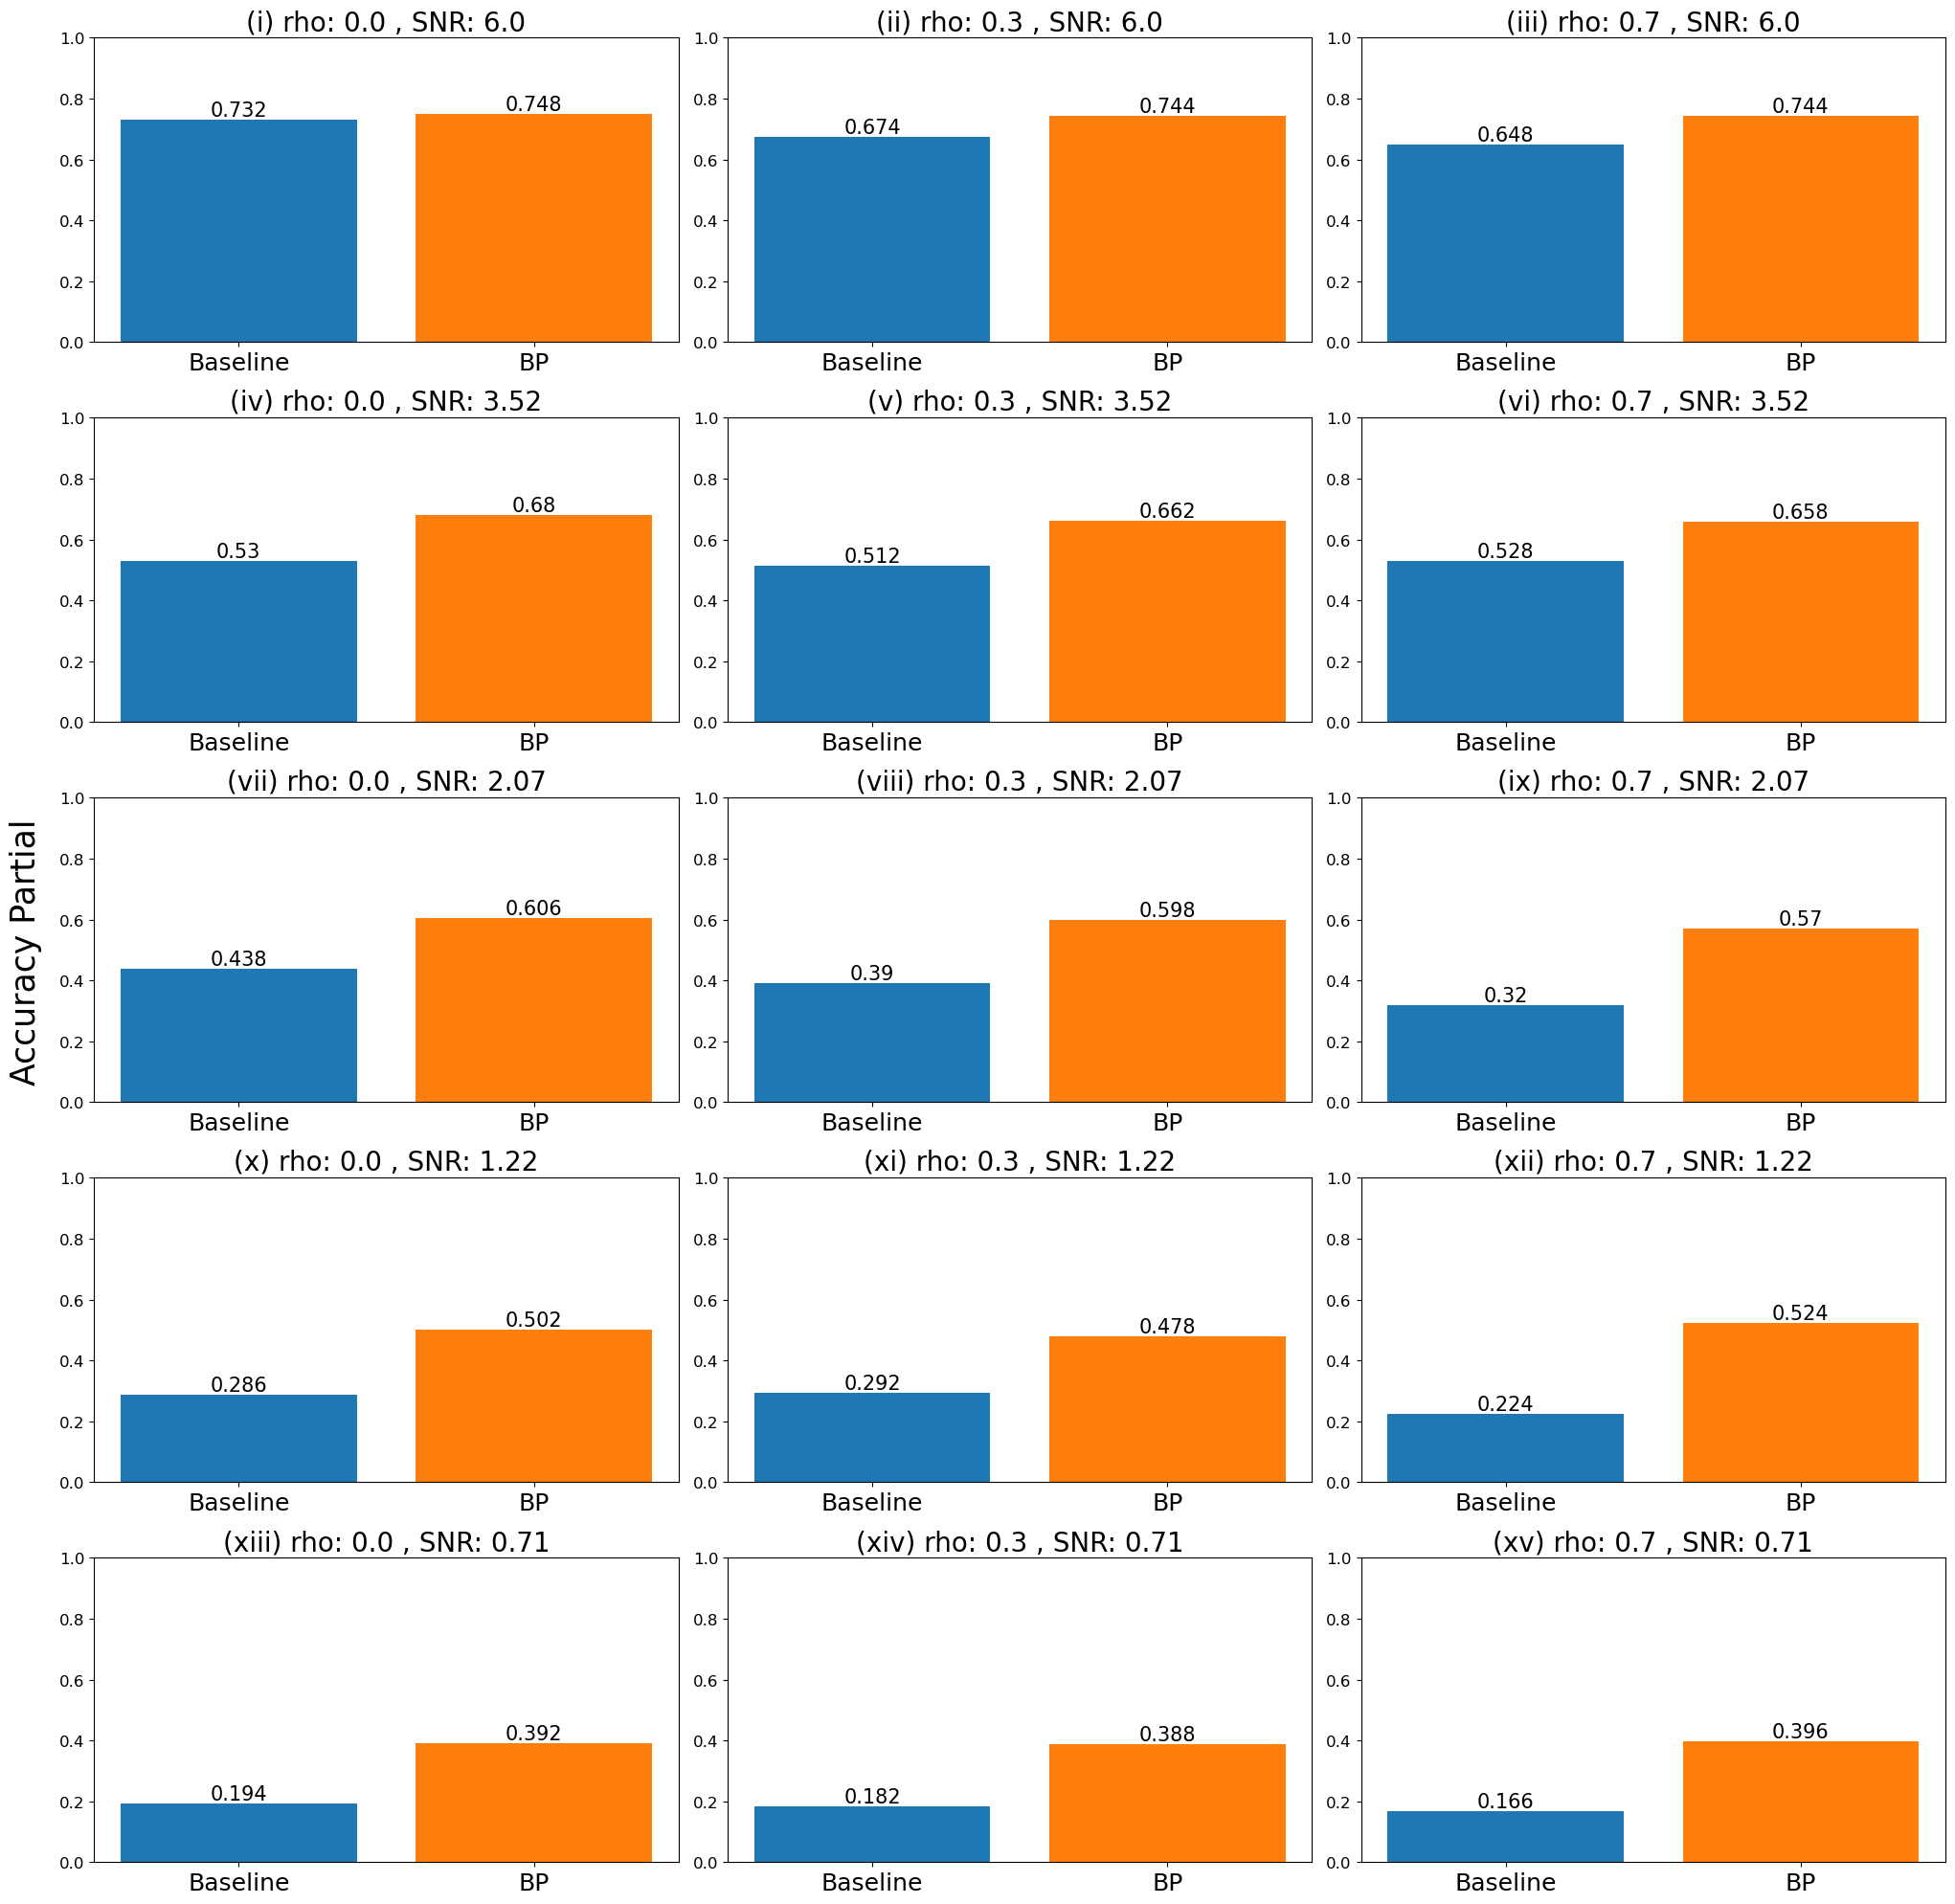

In [25]:
fig, ax = plt.subplots(5, 3, figsize=(20, 20))
i = -1
for g, ax in zip(group_list, ax.ravel()):
    i = i+1
    p = ax.bar(df_plot.loc[df_plot["group"] == g, "method"],
         df_plot.loc[df_plot["group"] == g, "accuracy_partial"], color = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"])
    ax.set_yticks([0.0, 0.2, 0.4, 0.6,0.8, 1.0])
    ax.bar_label(p, label_type = "edge", fontsize = 15)
    ax.set_title( "(" + greek_list[i] + ") "+ g, fontsize = 20)
    ax.tick_params(axis='x', which='major', labelsize=18)
    ax.tick_params(axis='y', which='major', labelsize=12)
    

fig.tight_layout()
fig.text(-0.01, 0.5, 'Accuracy Partial', va='center', ha='center', rotation='vertical', fontsize = 25)
plt.show()

# For thesis

In [26]:
df_count["method"] = "Baseline"
#df_count_quad["method"] = "Squared"
#df_count_sqBigM["method"] = "squared BigM"
#df_count_reg["method"] = r'$l$2 reg'
df_BP_count["method"] = "BP"
#df_bayes_count["method"] = "Bayes"
df_plot_first = pd.concat([df_count, df_BP_count], ignore_index = True)

df_plot_first["group"] = "rho: " + df_plot_first["rho"].astype(str) + " , SNR: " + df_plot_first["SNR"].astype(str)
df_plot_first

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial,method,group
0,0.0,0.71,1000,81,97,0.162,0.194,Baseline,"rho: 0.0 , SNR: 0.71"
1,0.0,1.22,1000,121,143,0.242,0.286,Baseline,"rho: 0.0 , SNR: 1.22"
2,0.0,2.07,1000,206,219,0.412,0.438,Baseline,"rho: 0.0 , SNR: 2.07"
3,0.0,3.52,1000,261,265,0.522,0.530,Baseline,"rho: 0.0 , SNR: 3.52"
4,0.0,6.00,1000,364,366,0.728,0.732,Baseline,"rho: 0.0 , SNR: 6.0"
5,0.3,0.71,1000,51,91,0.102,0.182,Baseline,"rho: 0.3 , SNR: 0.71"
6,0.3,1.22,1000,112,146,0.224,0.292,Baseline,"rho: 0.3 , SNR: 1.22"
7,0.3,2.07,1000,164,195,0.328,0.390,Baseline,"rho: 0.3 , SNR: 2.07"
8,0.3,3.52,1000,246,256,0.492,0.512,Baseline,"rho: 0.3 , SNR: 3.52"
9,0.3,6.00,1000,334,337,0.668,0.674,Baseline,"rho: 0.3 , SNR: 6.0"


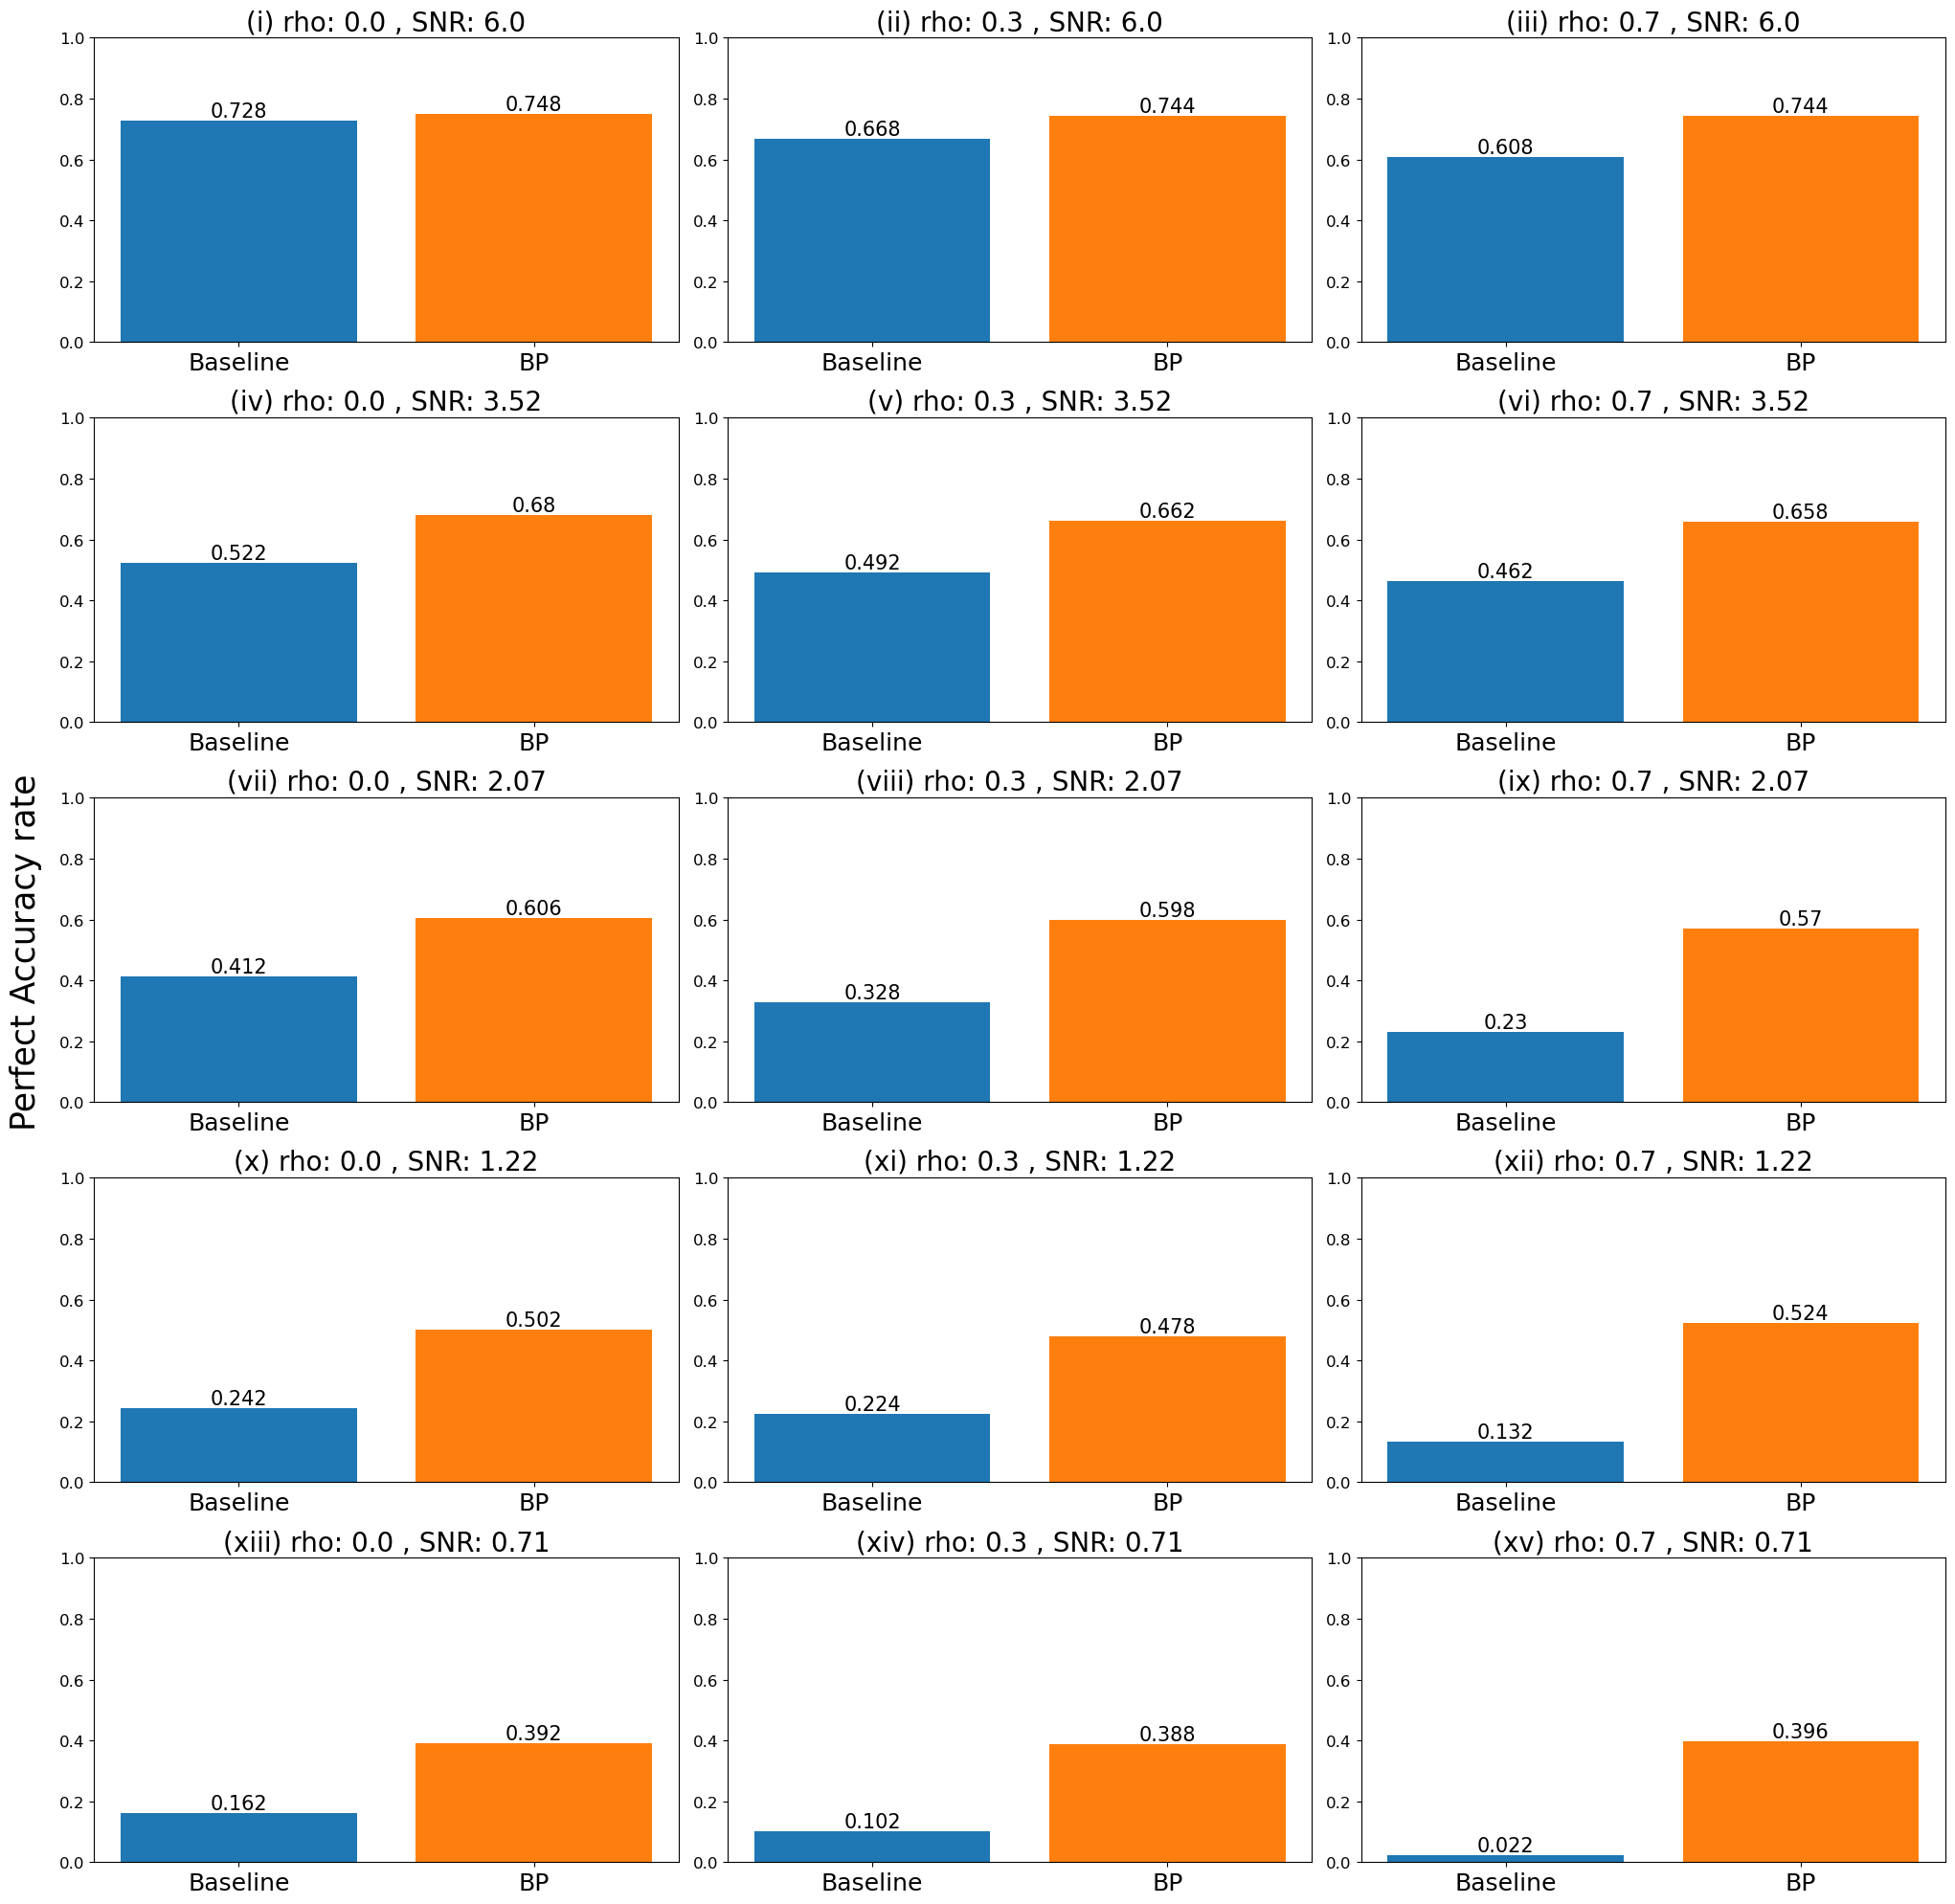

In [27]:
fig, ax = plt.subplots(5, 3, figsize=(20, 20))
i = -1
for g, ax in zip(group_list, ax.ravel()):
    i = i+1
    p = ax.bar(df_plot_first.loc[df_plot_first["group"] == g, "method"],
         df_plot_first.loc[df_plot_first["group"] == g, "accuracy_perfect"], color = ["tab:blue", "tab:orange", "tab:red", "tab:purple"]) # if bayes is included, ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]
    ax.set_yticks([0.0, 0.2, 0.4, 0.6,0.8, 1.0])
    ax.bar_label(p, label_type = "edge", fontsize = 15)
    ax.set_title( "(" + greek_list[i] + ") "+ g, fontsize = 20)
    ax.tick_params(axis='x', which='major', labelsize=18)
    ax.tick_params(axis='y', which='major', labelsize=12)
    

fig.tight_layout()
fig.text(-0.01, 0.5, 'Perfect Accuracy rate', va='center', ha='center', rotation='vertical', fontsize = 25)
plt.show()

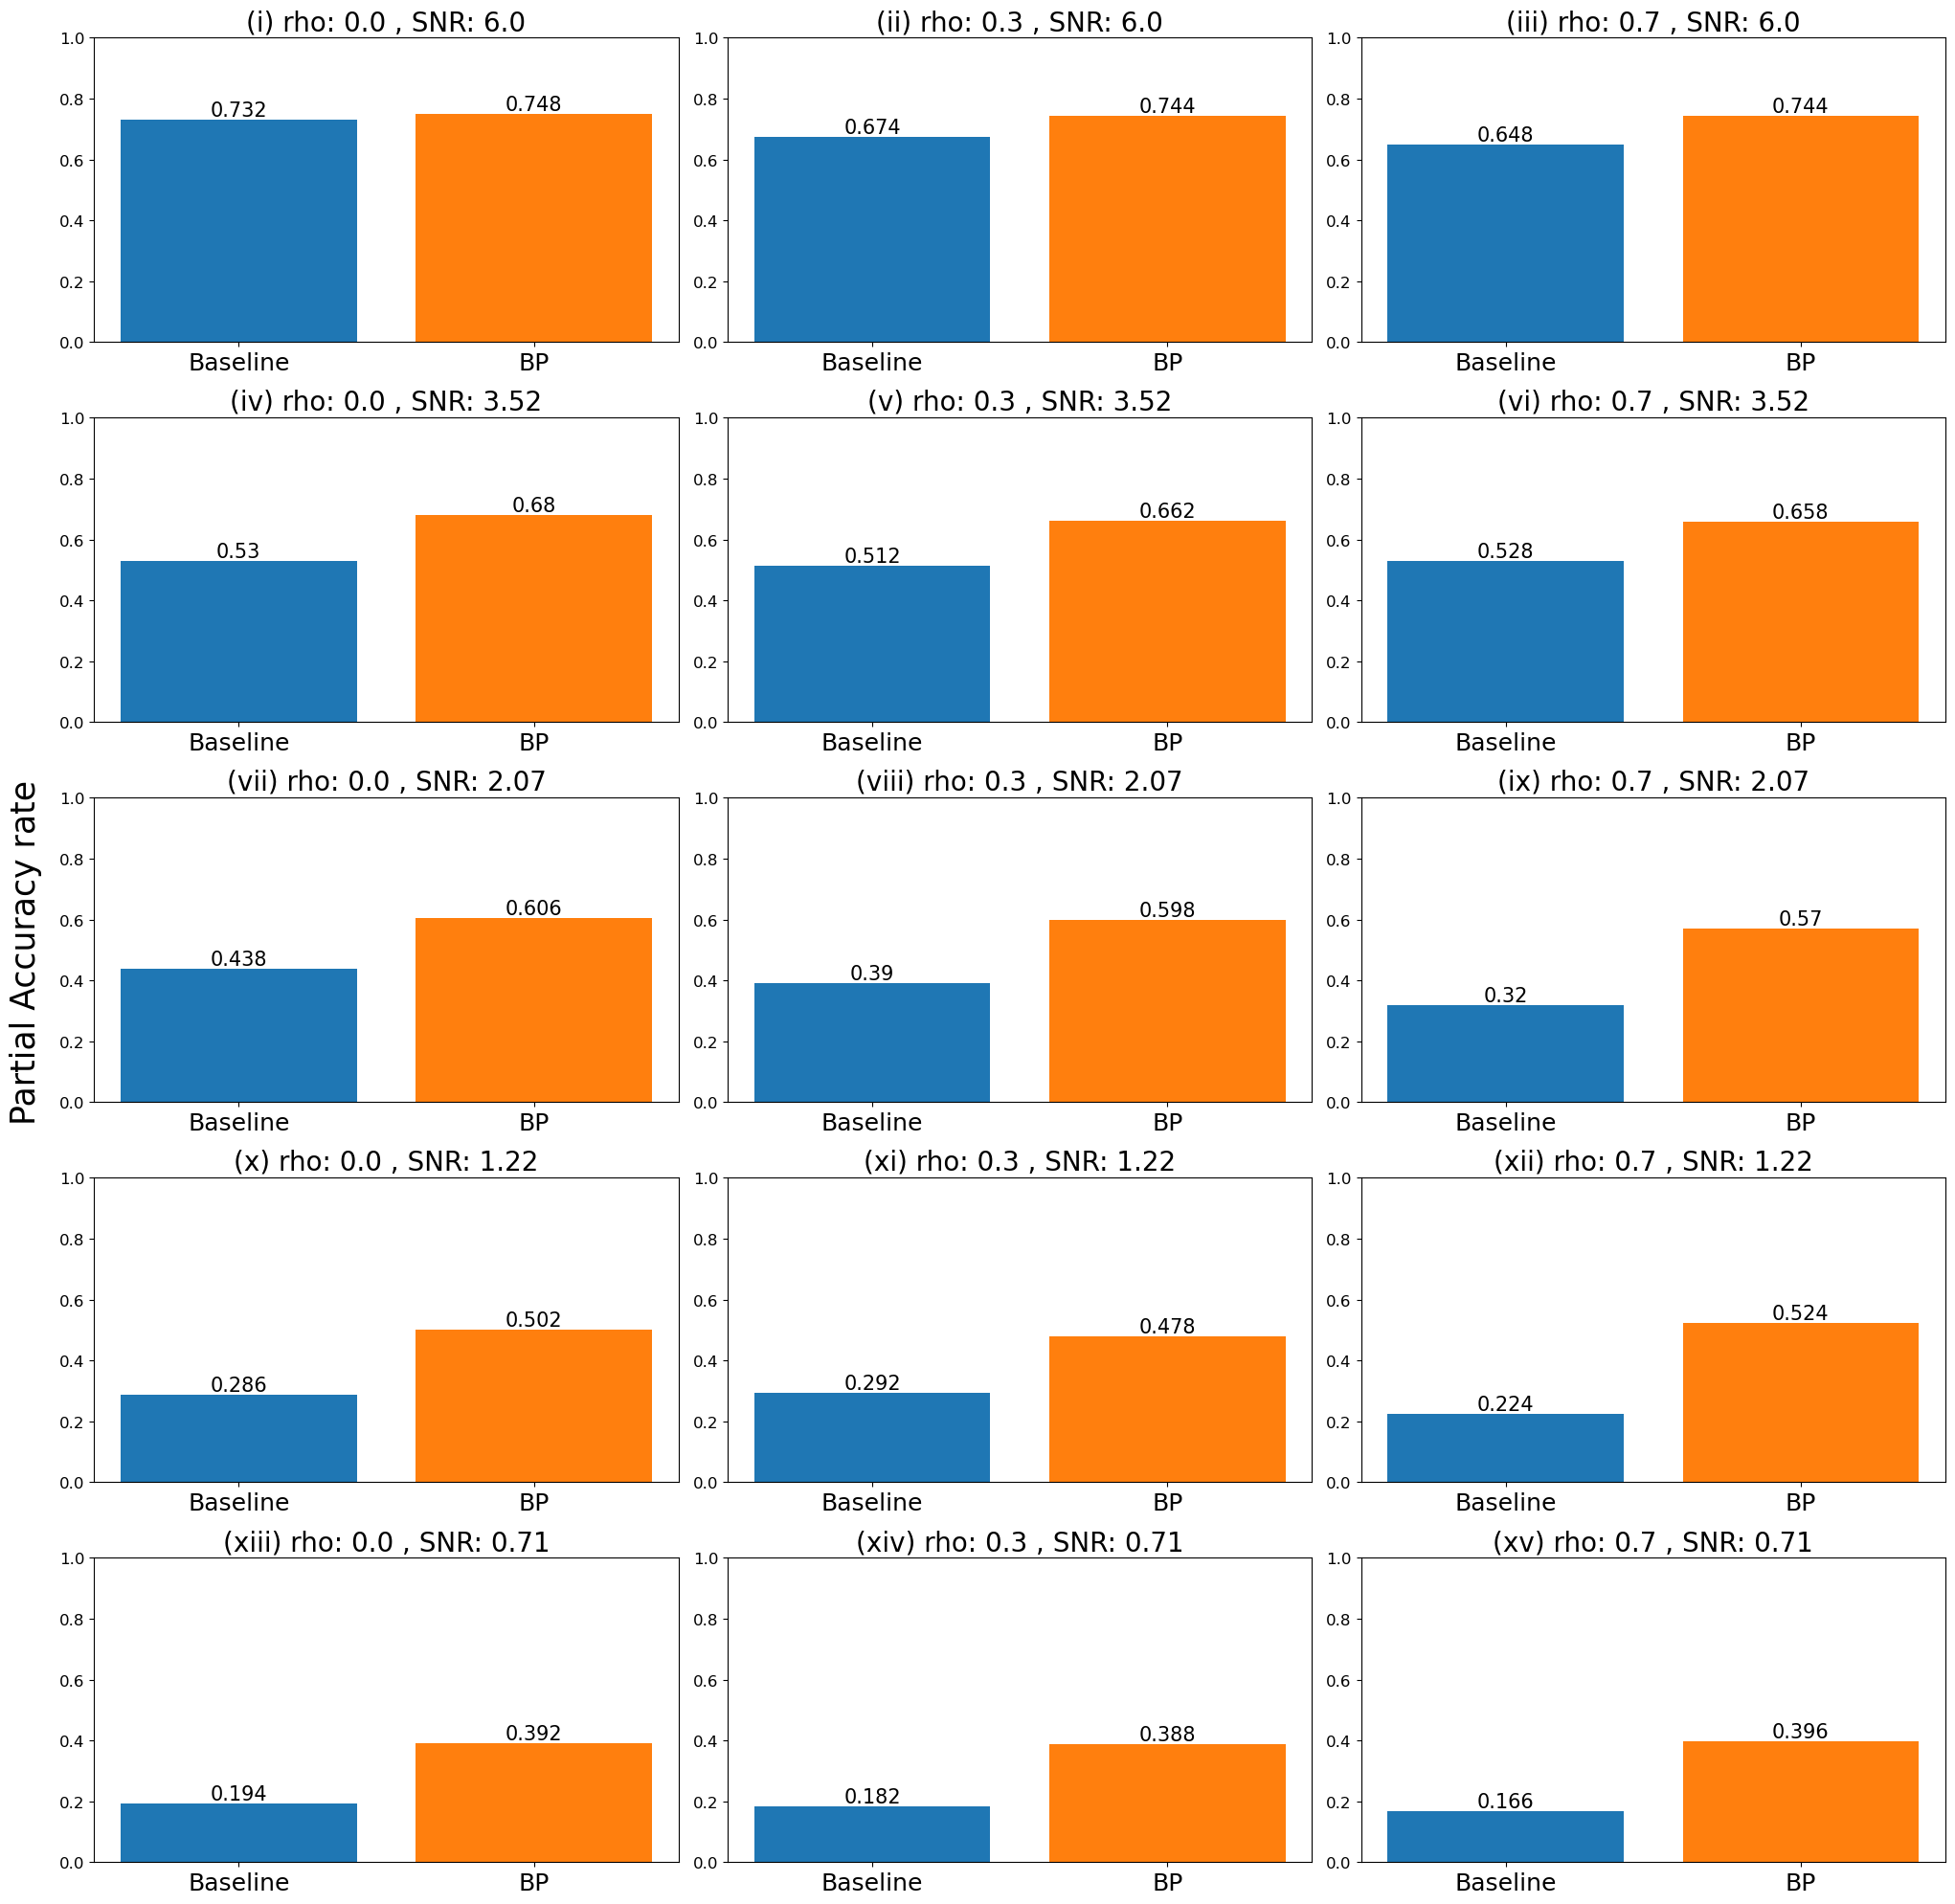

In [28]:
fig, ax = plt.subplots(5, 3, figsize=(20, 20))
i = -1
for g, ax in zip(group_list, ax.ravel()):
    i = i+1
    p = ax.bar(df_plot_first.loc[df_plot_first["group"] == g, "method"],
         df_plot_first.loc[df_plot_first["group"] == g, "accuracy_partial"], color = ["tab:blue", "tab:orange", "tab:red", "tab:purple"]) # if bayes is included, ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]
    ax.set_yticks([0.0, 0.2, 0.4, 0.6,0.8, 1.0])
    ax.bar_label(p, label_type = "edge", fontsize = 15)
    ax.set_title( "(" + greek_list[i] + ") "+ g, fontsize = 20)
    ax.tick_params(axis='x', which='major', labelsize=18)
    ax.tick_params(axis='y', which='major', labelsize=12)
    

fig.tight_layout()
fig.text(-0.01, 0.5, 'Partial Accuracy rate', va='center', ha='center', rotation='vertical', fontsize = 25)
plt.show()

In [29]:
df_count["method"] = "Baseline"
df_count_quad["method"] = "Squared"
#df_count_sqBigM["method"] = "squared BigM"
df_count_reg["method"] = r'$l$2 reg'
df_BP_count["method"] = "BP"
#df_bayes_count["method"] = "Bayes"
df_plot = pd.concat([df_count, df_BP_count, df_count_quad, df_count_reg], ignore_index = True)

df_plot["group"] = "rho: " + df_plot["rho"].astype(str) + " , SNR: " + df_plot["SNR"].astype(str)
df_plot

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial,method,group
0,0.0,0.71,1000,81,97,0.162,0.194,Baseline,"rho: 0.0 , SNR: 0.71"
1,0.0,1.22,1000,121,143,0.242,0.286,Baseline,"rho: 0.0 , SNR: 1.22"
2,0.0,2.07,1000,206,219,0.412,0.438,Baseline,"rho: 0.0 , SNR: 2.07"
3,0.0,3.52,1000,261,265,0.522,0.530,Baseline,"rho: 0.0 , SNR: 3.52"
4,0.0,6.00,1000,364,366,0.728,0.732,Baseline,"rho: 0.0 , SNR: 6.0"
5,0.3,0.71,1000,51,91,0.102,0.182,Baseline,"rho: 0.3 , SNR: 0.71"
6,0.3,1.22,1000,112,146,0.224,0.292,Baseline,"rho: 0.3 , SNR: 1.22"
7,0.3,2.07,1000,164,195,0.328,0.390,Baseline,"rho: 0.3 , SNR: 2.07"
8,0.3,3.52,1000,246,256,0.492,0.512,Baseline,"rho: 0.3 , SNR: 3.52"
9,0.3,6.00,1000,334,337,0.668,0.674,Baseline,"rho: 0.3 , SNR: 6.0"


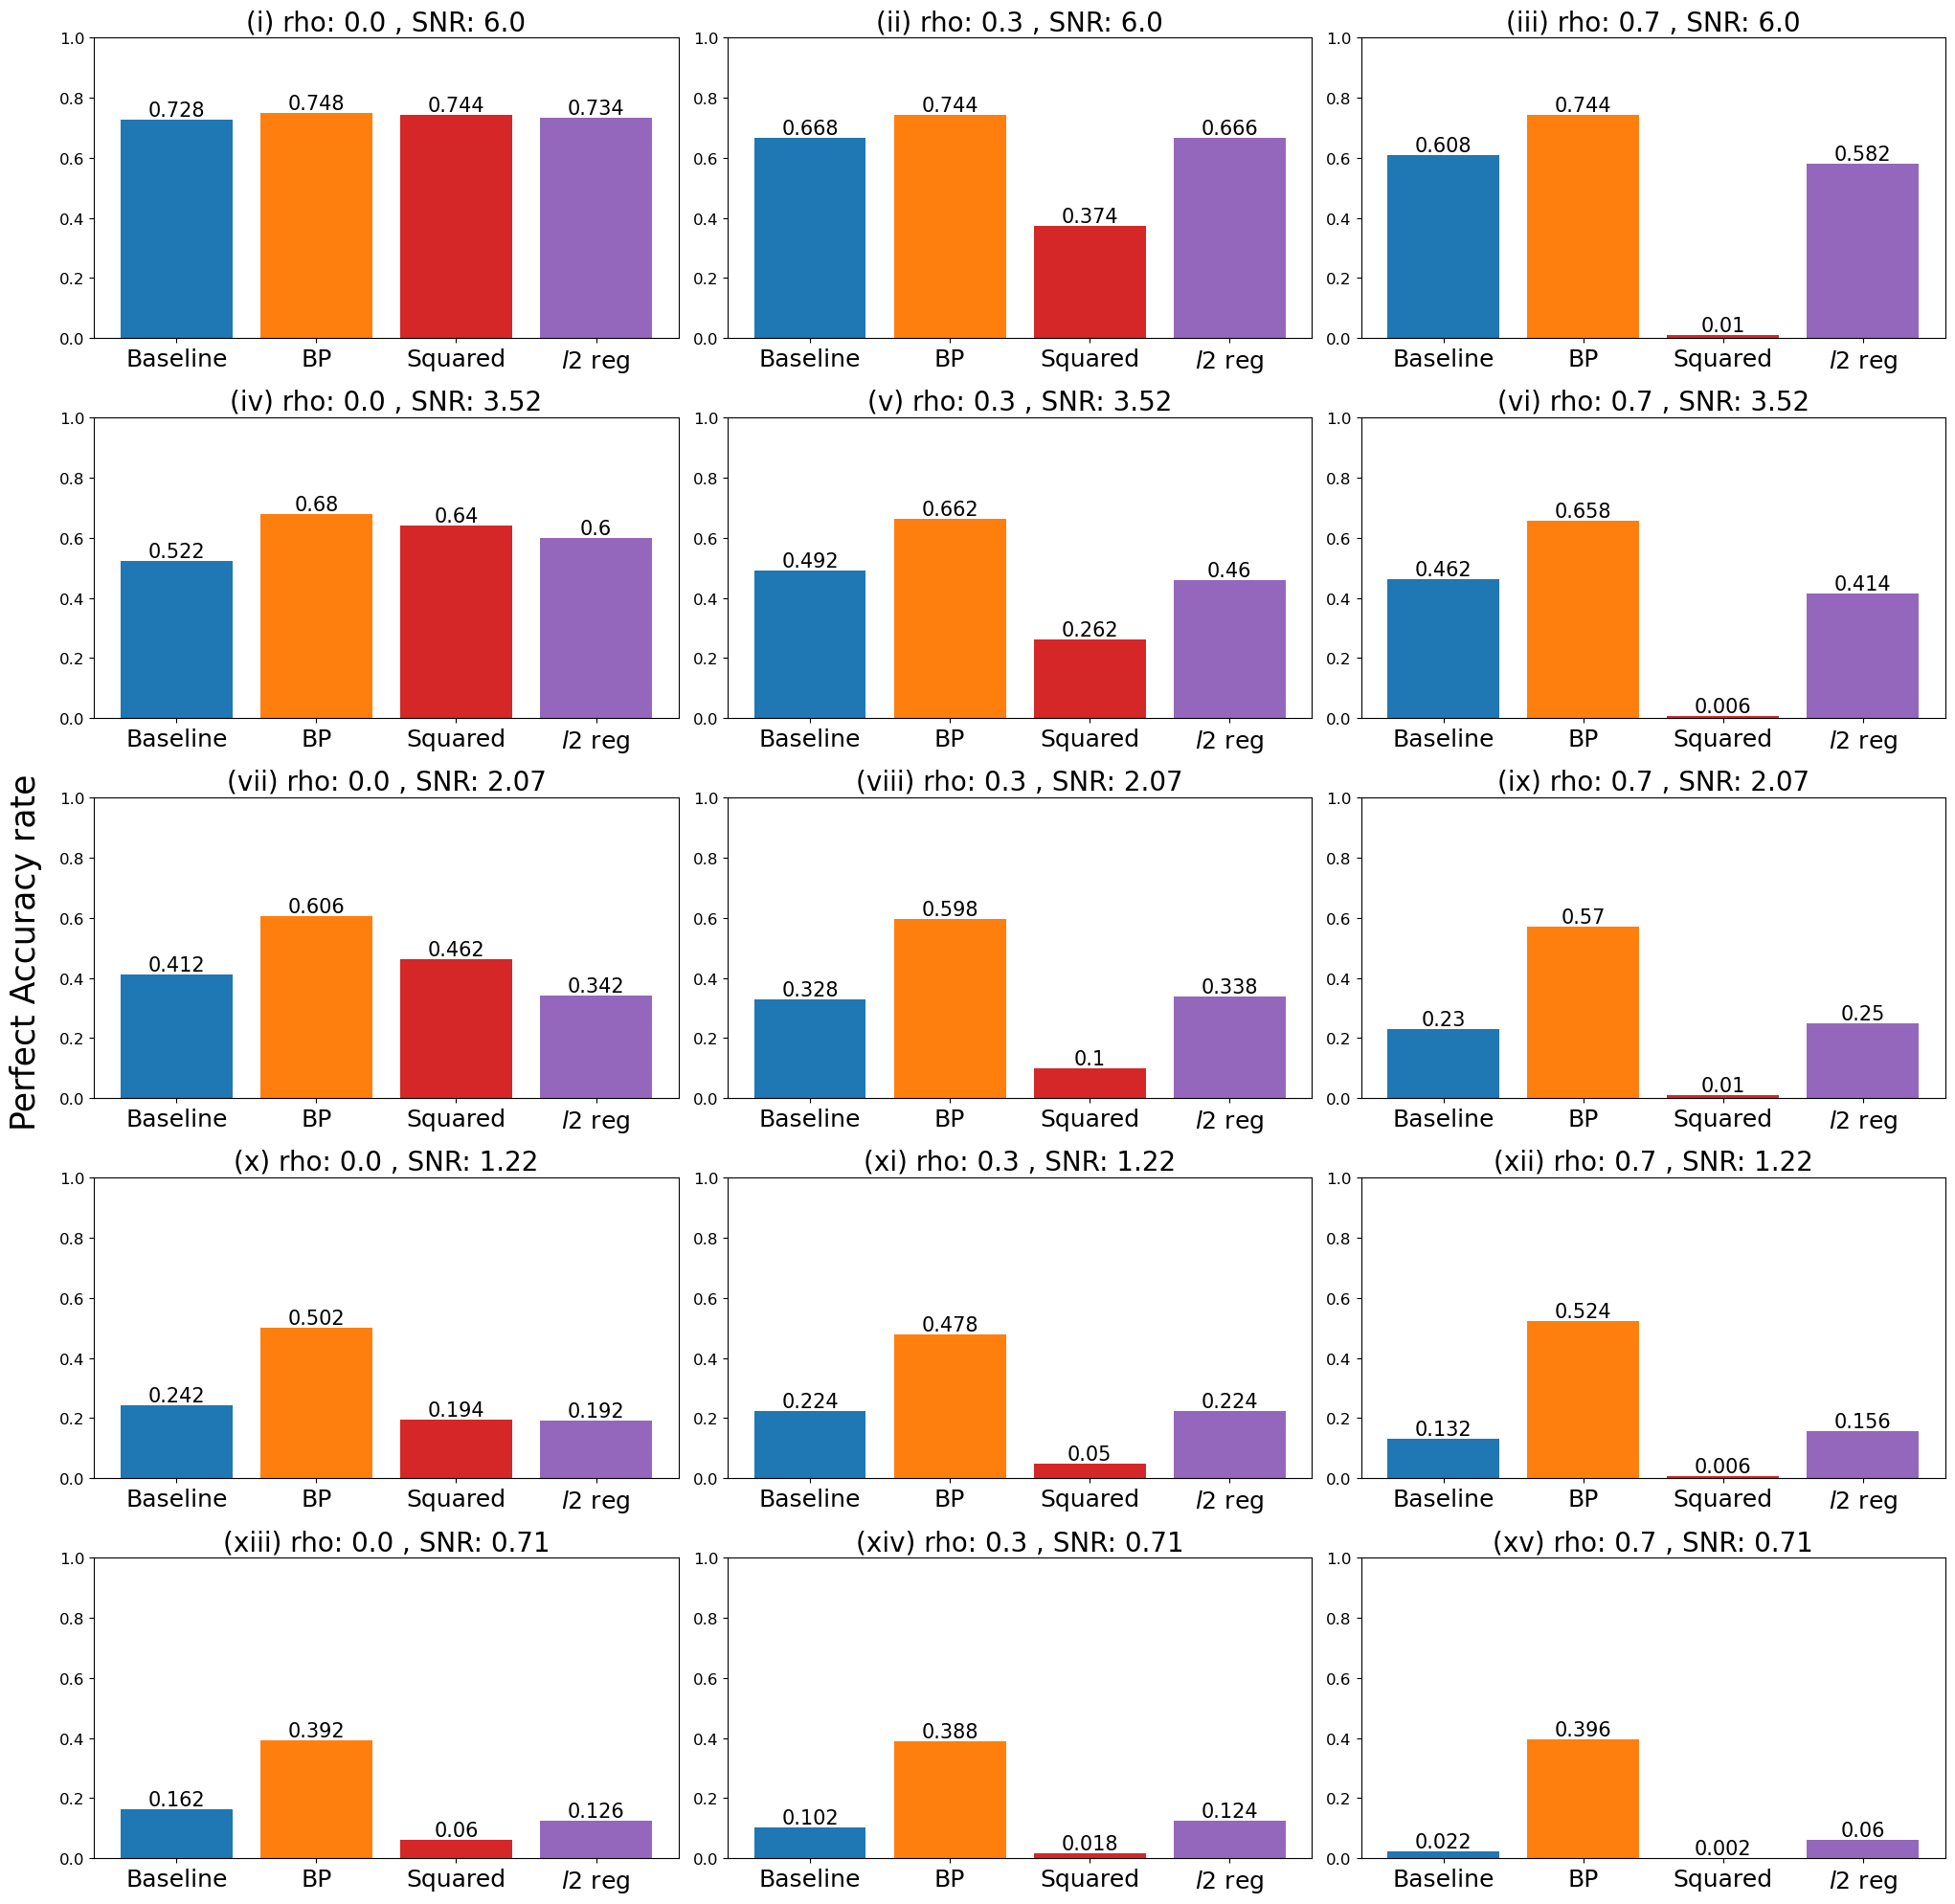

In [30]:
fig, ax = plt.subplots(5, 3, figsize=(20, 20))
i = -1
for g, ax in zip(group_list, ax.ravel()):
    i = i+1
    p = ax.bar(df_plot.loc[df_plot["group"] == g, "method"],
         df_plot.loc[df_plot["group"] == g, "accuracy_perfect"], color = ["tab:blue", "tab:orange", "tab:red", "tab:purple"]) # if bayes is included, ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]
    ax.set_yticks([0.0, 0.2, 0.4, 0.6,0.8, 1.0])
    ax.bar_label(p, label_type = "edge", fontsize = 15)
    ax.set_title( "(" + greek_list[i] + ") "+ g, fontsize = 20)
    ax.tick_params(axis='x', which='major', labelsize=18)
    ax.tick_params(axis='y', which='major', labelsize=12)
    

fig.tight_layout()
fig.text(-0.01, 0.5, 'Perfect Accuracy rate', va='center', ha='center', rotation='vertical', fontsize = 25)
plt.show()

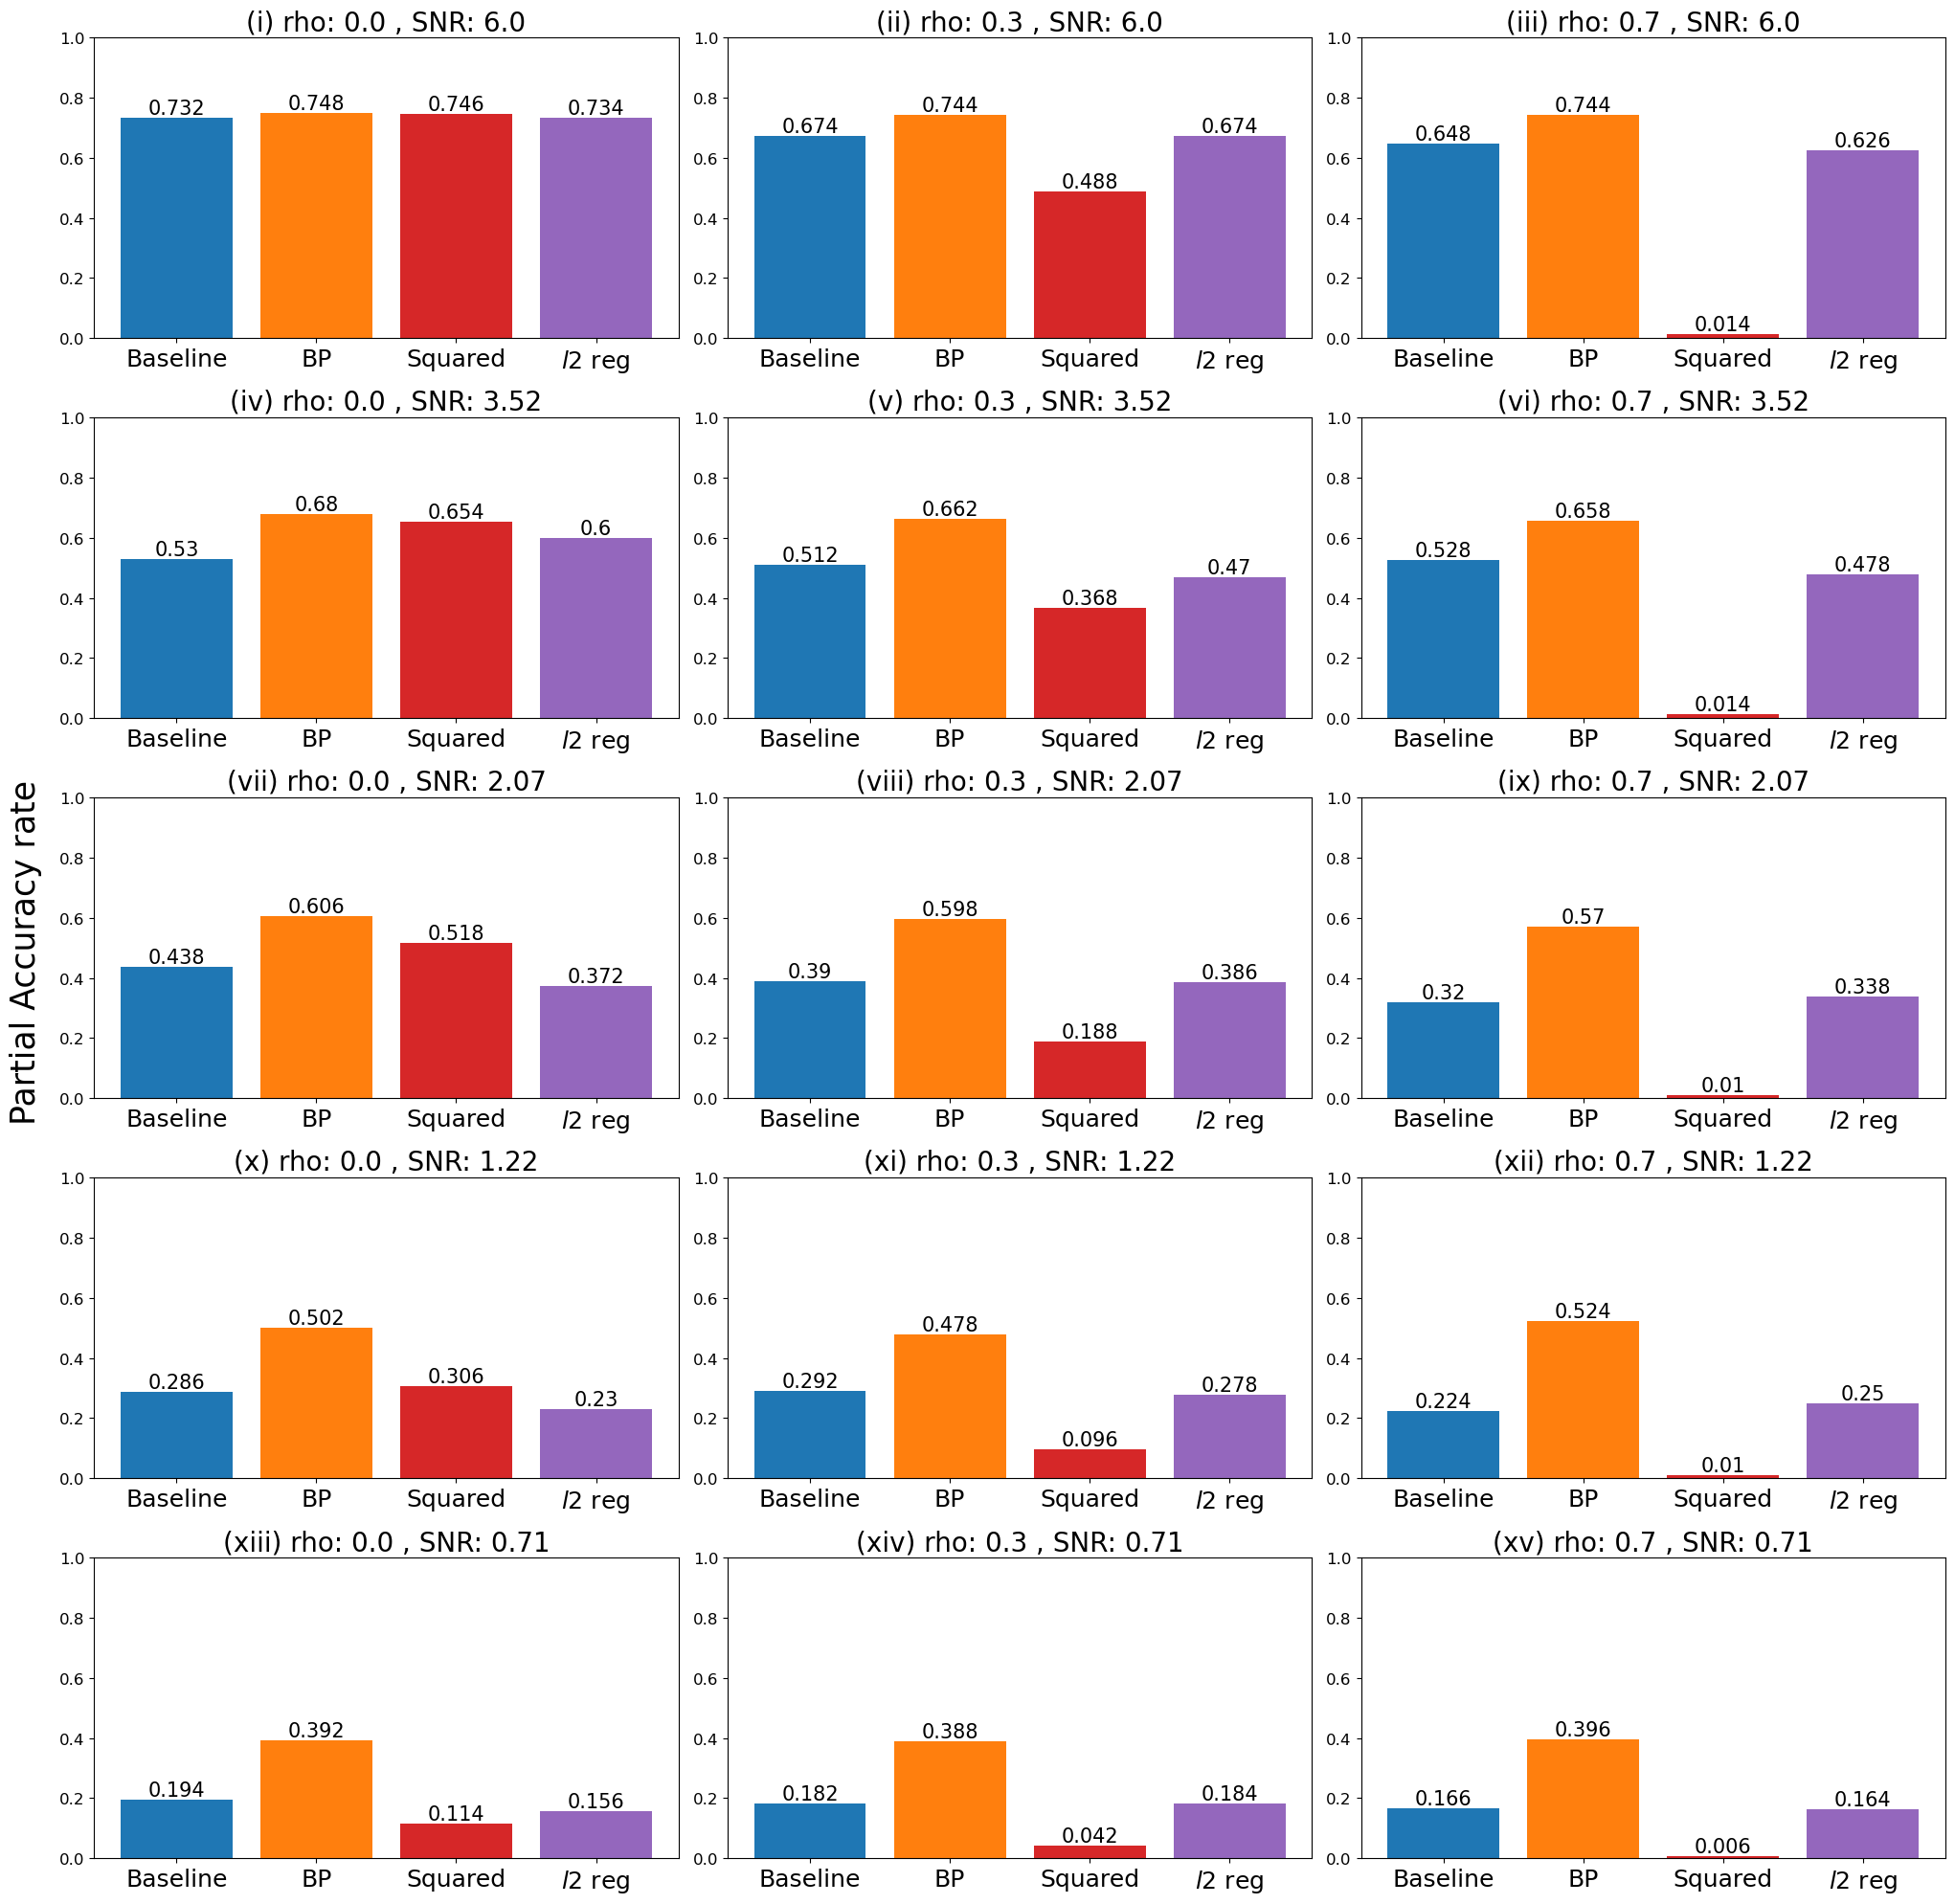

In [31]:
fig, ax = plt.subplots(5, 3, figsize=(20, 20))
i = -1
for g, ax in zip(group_list, ax.ravel()):
    i = i+1
    p = ax.bar(df_plot.loc[df_plot["group"] == g, "method"],
         df_plot.loc[df_plot["group"] == g, "accuracy_partial"], color = ["tab:blue", "tab:orange", "tab:red", "tab:purple"]) # if bayes is included, ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]
    ax.set_yticks([0.0, 0.2, 0.4, 0.6,0.8, 1.0])
    ax.bar_label(p, label_type = "edge", fontsize = 15)
    ax.set_title( "(" + greek_list[i] + ") "+ g, fontsize = 20)
    ax.tick_params(axis='x', which='major', labelsize=18)
    ax.tick_params(axis='y', which='major', labelsize=12)
    

fig.tight_layout()
fig.text(-0.01, 0.5, 'Partial Accuracy rate', va='center', ha='center', rotation='vertical', fontsize = 25)
plt.show()